# Twitter Sentiment: Climate Change Belief Analysis
## GROUP 3: Advanced Classification Predict

![image-2.png](attachment:image-2.png)


# Introduction 

Environmental activism has reached an inflection point, as consumers increasingly demand change from business leaders and corporations, Deloitte research reveals (link to article below)

https://deloitte.wsj.com/articles/consumers-expect-brands-to-address-climate-change-01618945334

Companies also want to offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. It is in their interrest to know what peoples opinions are about global warming. Do people think that it is a real threat? This would add to their market research efforts in gauging how their product/service may be received.

#### **With this context**, the purpose of this predict is to build a Classification Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. 

## Table of Contents

1. Intro to Comet
2. Importing Libraries
3. Importing Dataset
4. Exploratory Data Analysis
5. Data Preprocessing
6. Modelling
7. Submission
8. Conclusion

## 1. Comet 

Comet is a a tool used for model versioning and experimentation as it records the parameters and conditions from each conducted experiements. Comet allows for reproducing of results, and/or going back to a previous version of the experiment.

In [ ]:
# Only excecute this once to load comet into your enviroment
#!pip install comet_ml

In [ ]:

# # Loading in the comet_ml tool
# import comet_ml
# from comet_ml import Experiment
    
# # Setting the API key, saved as environment variable 
# experiment = Experiment(api_key="1DpubPFI6szNQR3Dou0CiLiDC",
#         project_name="general", workspace="drikus-d")
# experiment.display()

# 2. Loading Libraries
All Python capabilities are not loaded into our working environment by default (even those that are already installed in your system). So, we import each and every library that we want to use.

In data science, numpy and pandas are the most commonly used libraries. Numpy is required for calculations like mean, median, square roots, etc. Pandas is used for data processing and data frames. We choose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd).

In [ ]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipulation tool

import requests
import io

# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import time
import timeit
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl

# Quality of all figures in notebook
mpl.rcParams['figure.dpi'] = 180

# NLP Libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag

# Model Evaluation Packages
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.utils import resample

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# 3. Loading Dataset
Pandas module used for inporting dataset 
<br>In read_csv() function, we have passed the location to where the files are located in the dphi official github page

In [ ]:
# In read_csv() function, we have passed the location to where the files are located in the official github page.
url = "https://github.com/drikus-d/classification-predict-streamlit-template/blob/master/resources/train.csv?raw=true" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
train_data = pd.read_csv(io.StringIO(download.decode('utf-8')))

url = "https://github.com/drikus-d/classification-predict-streamlit-template/blob/master/resources/test_with_no_labels.csv?raw=true" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
test_data = pd.read_csv(io.StringIO(download.decode('utf-8')))


# Printing out the first 5 rows of the dataframe
print (train_data.head())

   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954


# 4. Exploratory Data Analysis (EDA)

In this section, data will be explored through an analysis of the different Climate Change sentiments that people have on Twitter.

**Analysis techniques to be explored with the data:**

- Summary Statistics
- An analysis of the Tweets statistics
- Understanding the length of our tweets
- Data Visualisation 

### 4.1 Summary Statistics

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


From the above it's clear that we don't have missing values, with 15819 rows of data, with 3 columns. 
<br>**Sentiment** and **tweetID** are integers 
<br>**message** (the tweet) is an object (String type) 

In [ ]:
# Shape of the dataset
train_data.shape

(15819, 3)

**Missing values**

In [ ]:
# Checking for missing values for train data 
train_data.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Fortunately, there are no missing values in our dataset.

#### What does a sample tweet look like? 

In [ ]:
# Print out a Sample tweet
tweet = train_data.iloc[4,1]
print(tweet)

RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight


#### Are any tweets white space characters only? 

In [ ]:
# Checking whether a character is white-space character or not
print(len(train_data['message']))
print(sum(train_data['message'].apply(lambda x: x.isspace())))

15819
0


**The target labels of climate change sentiments**

In [ ]:
# Looking at the numbers of possible classes in our sentiment
train_data['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

The tweets sentiments are divided into four (4) classes:

*  [ 2 ] - News: tweets links to factual news about climate change
*  [ 1 ] - Pro: tweets that supports the belief of man-made climate change
*  [ 0 ] - Neutral: tweets that neither support nor refutes the belief of man-made climate change
*  [-1 ] - Anti (Negative): tweets that does not believe in man-made climate change

#### What is the distribution of the data between the target labels?

In [ ]:
#extract the value counts per sentiment class
a = train_data.sentiment.value_counts()
#calculate the percentage of each sentiment class
b = 100*train_data.sentiment.value_counts()/len(train_data.sentiment)
b = round(b,2)
data = pd.concat([a,b],axis =1,)
data.columns = ['Value Count', 'Percentage']
data

,Value Count,Percentage
1,8530,53.92
2,3640,23.01
0,2353,14.87
-1,1296,8.19


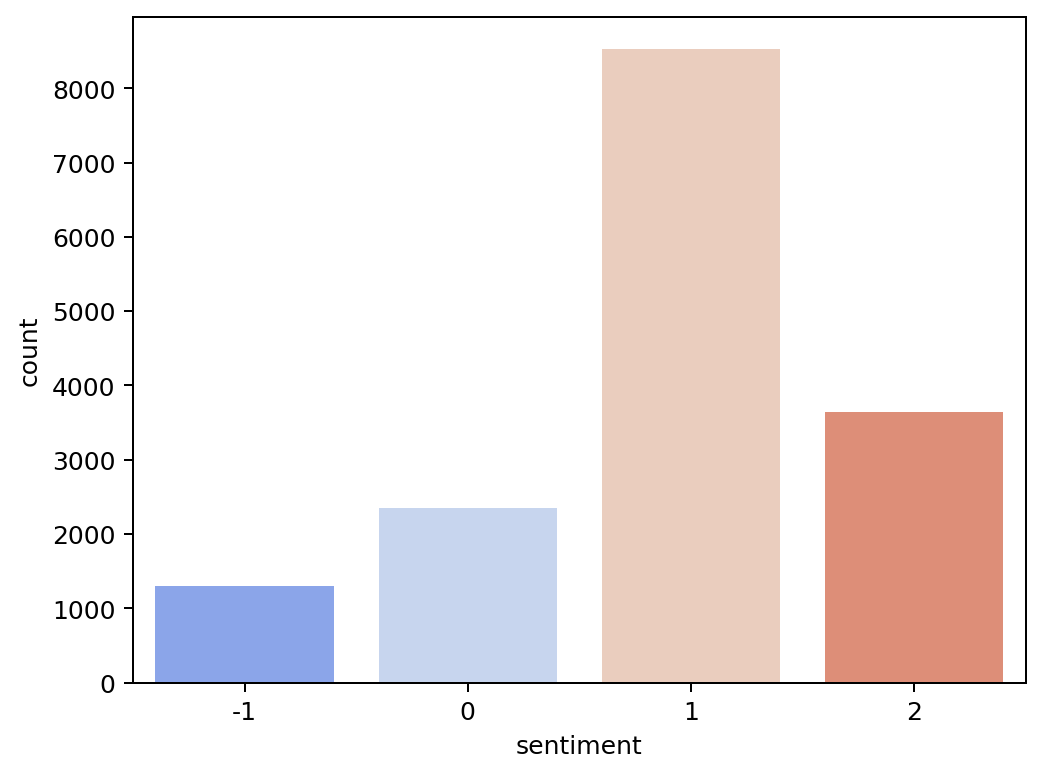

In [ ]:
sns.countplot(x='sentiment',data=train_data,palette='coolwarm')
plt.show()

An imbalance of classes occurs in the in the dataset as seen in the table and graph above. There is a lot more of the '1' sentiment relative to the rest, which is about 53.92%. This disproportionate ratio of observations in each class is common in machine learning. This can cause problems as most algorithms are designed to maximize accuracy and reduce error. Therefore we will be address and take care of the class imbalance in the data preprocessing. 

#### How many texts (density) are there per category given the length of the texts?

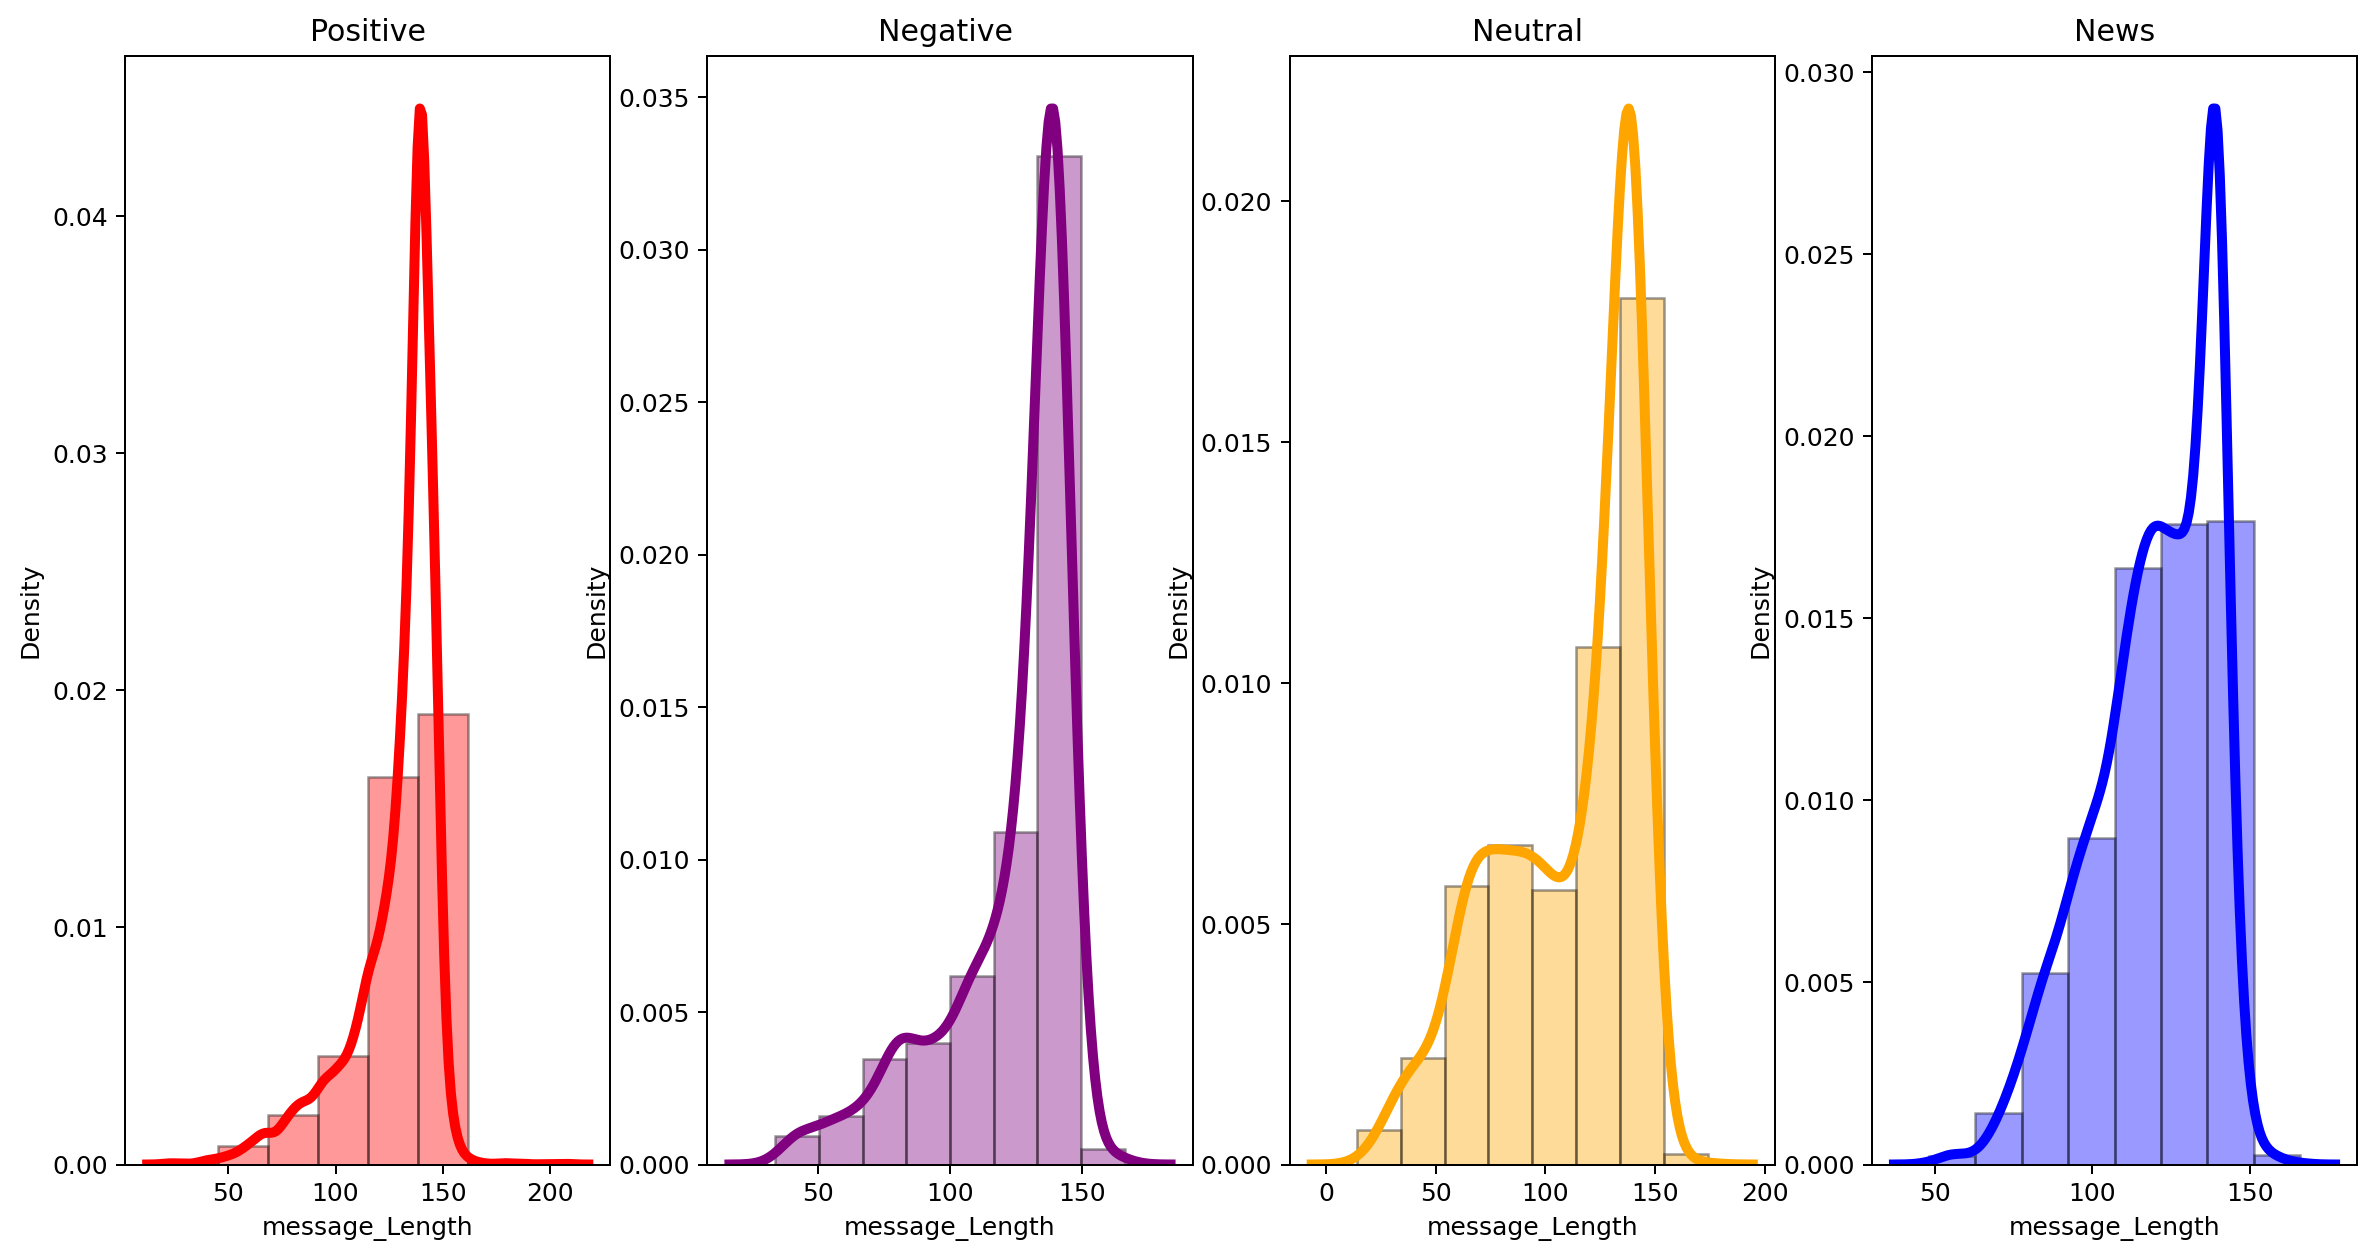

In [ ]:
# Distribution plots for the label
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))
#For Positive 
sns.distplot(train_data[train_data['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'red', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Positive')
ax1.set_xlabel('message_Length')
ax1.set_ylabel('Density')

#For Negative 
sns.distplot(train_data[train_data['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'purple', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Negative ')
ax2.set_xlabel('message_Length')
ax2.set_ylabel('Density')

#For Neutral 
sns.distplot(train_data[train_data['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'orange',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('message_Length')
ax3.set_ylabel('Density')

#For News
sns.distplot(train_data[train_data['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'blue', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('message_Length')
ax4.set_ylabel('Density')

#plt.title('Distribution of target labels')
plt.show()

The average length of messages for all sentiments is not suprising as a tweet is only limited to 140 characters. <br>Density contrast between positive and negative sentiments is interesting - positive tweets seem to be shorter. 
Now that we have explored our dataset, we can begin perfoming some analyses on it.

## 4.2 Data Visualisation

In this section the sentiments will be explored and looked as target variables. 

#### How is the data distributed between the label classes? 

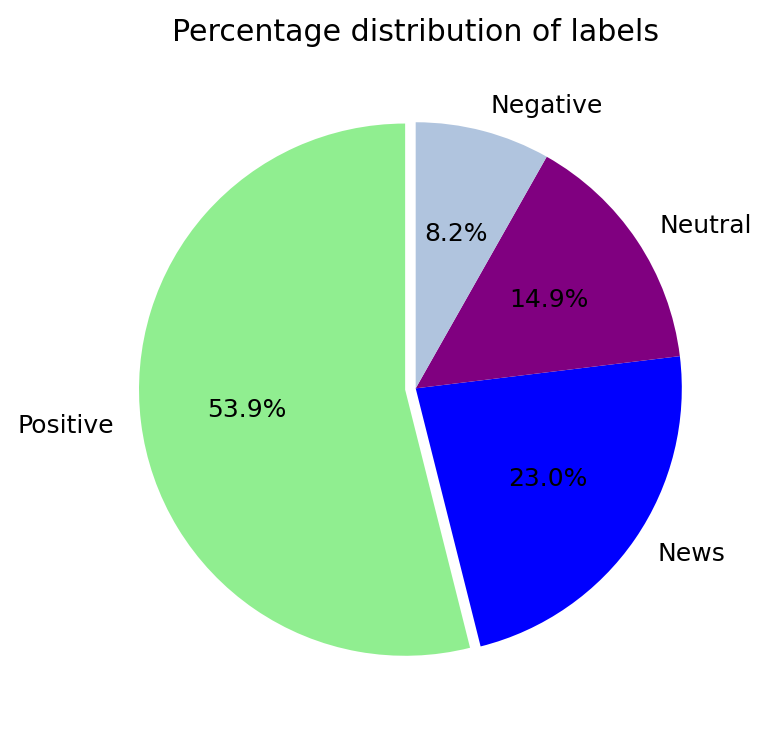

In [ ]:
#Making copy of train dataset
working_df = train_data.copy()
# Labeling the target
working_df['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in working_df['sentiment']]

# checking the numerical distribution
values = working_df['sentiment'].value_counts()/working_df.shape[0]
labels = (working_df['sentiment'].value_counts()/working_df.shape[0]).index
colors = ['lightgreen', 'blue', 'purple', 'lightsteelblue']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0, 0, 0), colors=colors)
plt.title('Percentage distribution of labels')
plt.show()

#### Viewed differently, what is the number messages per sentiment? 

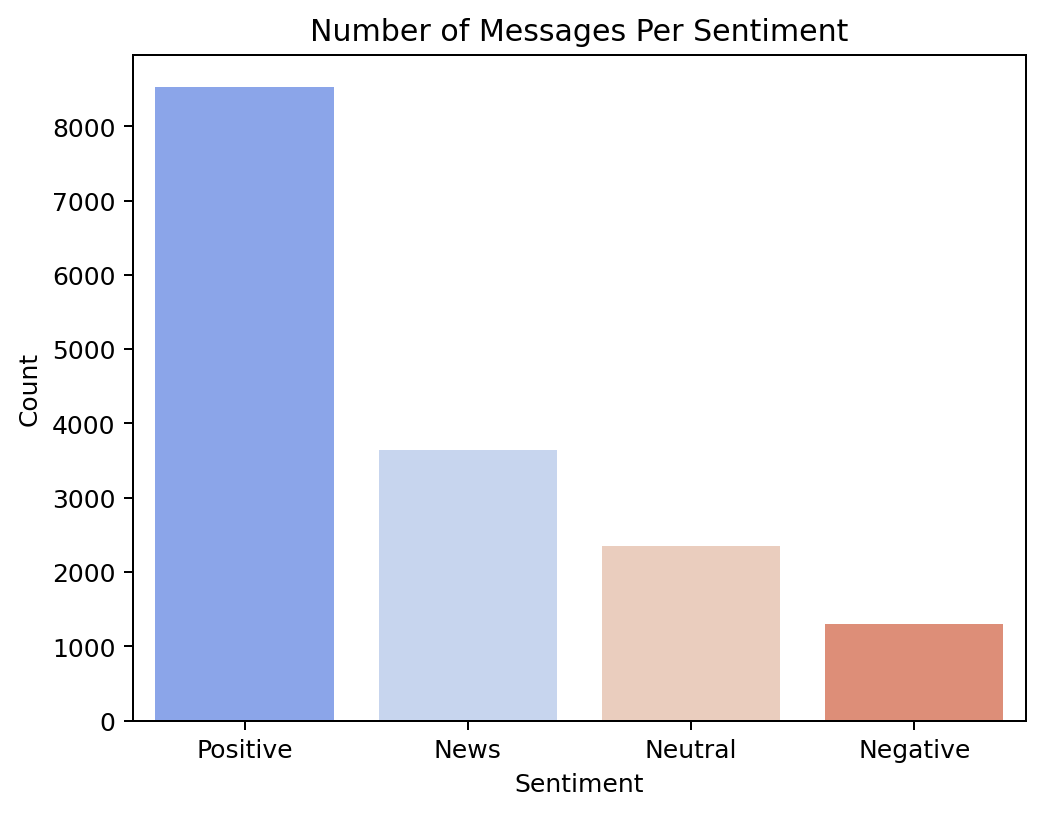

In [ ]:
sns.countplot(x='sentiment' ,data = working_df, palette='coolwarm')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.title('Number of Messages Per Sentiment')
plt.show()

To Note, there is an imbalance of classes in the dataset, with:
* positive tweets on climate change having the most number of tweets at 53.9% of our dataset. 
* tweets against climate change having the least number of counts (8.2%). 


#### What are the text lengths for each sentiment label? 

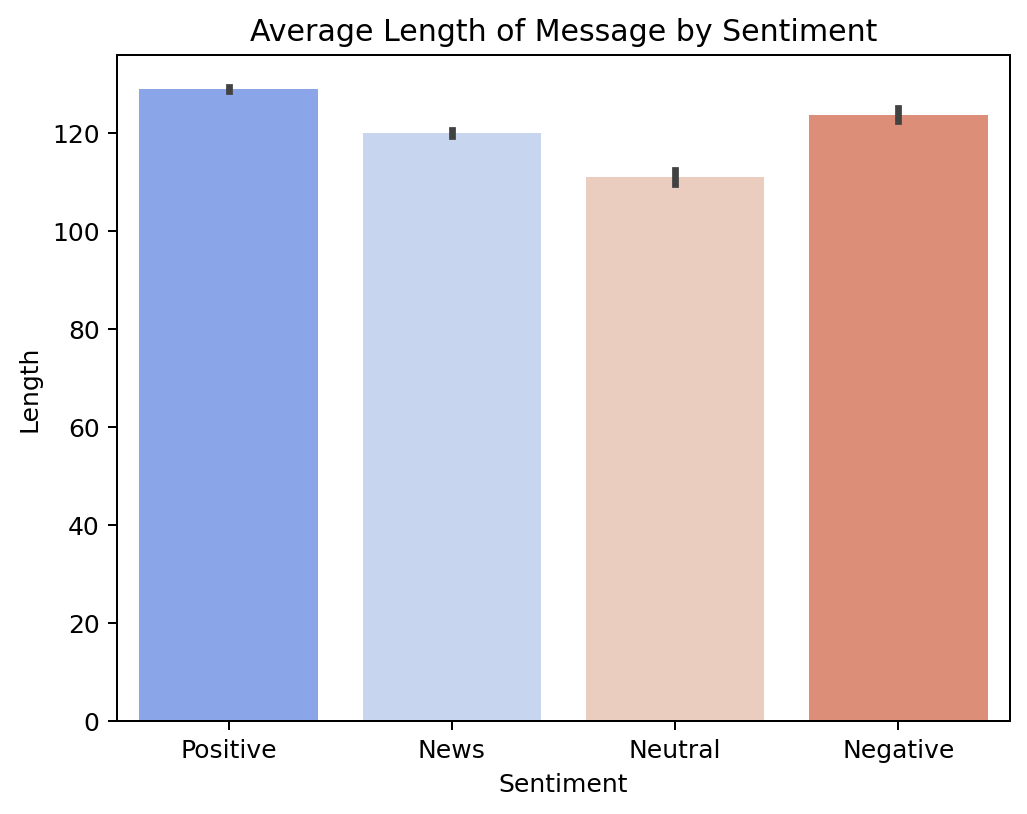

In [ ]:
# Visualizing text lengths for each sentiment
sns.barplot(x='sentiment', y=working_df['message'].apply(len) ,data = working_df, palette='coolwarm')
plt.ylabel('Length')
plt.xlabel('Sentiment')
plt.title('Average Length of Message by Sentiment')
plt.show()

The average text length of tweets is just about the same for each label. 

### Topics surrounding the climate change tweets

In order to understand the sentiments, one should understand the topics that are discussed in the data provided. This is done through extracting the most frequently used words.

**What are the most common words used?**

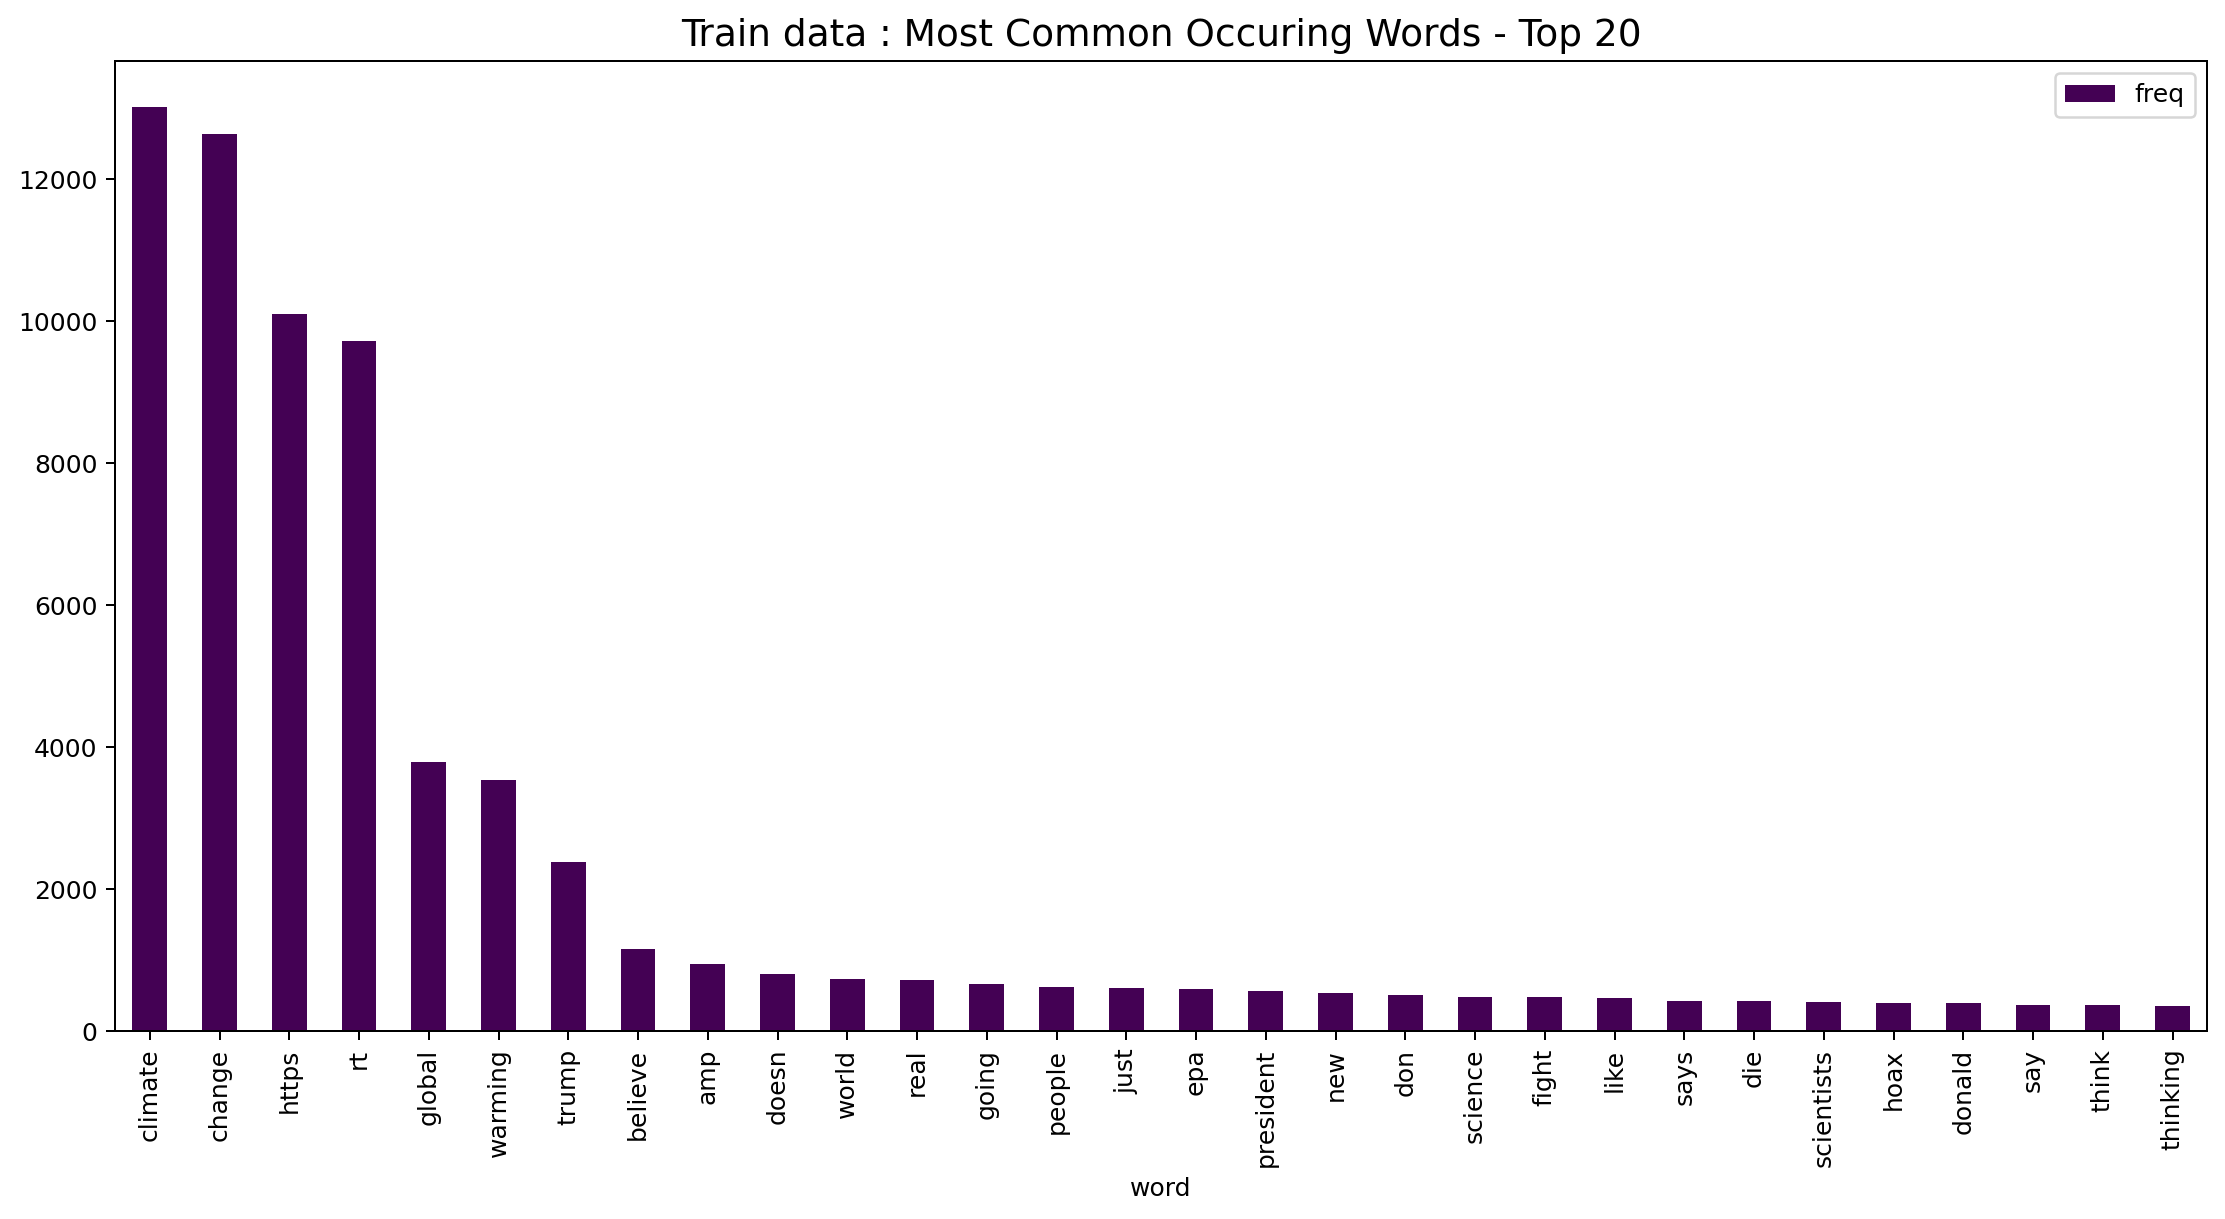

In [ ]:
#convert the test to numerical values 
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(working_df.message)

sum_words = words.sum(axis=0)
#create a frequency of most occuring words
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
#create a dataframe of the words and frequency 
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = '#440154')
plt.title("Train data : Most Common Occuring Words - Top 20",size=15)
plt.show()

In [ ]:
#words_freq

In [ ]:
#creating a word cloud from the data
wordcloud = WordCloud(background_color = 'white', 
                      width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(8,8))
plt.title("WordCloud - Vocabulary from tweets")
plt.imshow(wordcloud)

#### What are the count of the texts per twitter handle? 

In [ ]:
# Extracting Users in a column
working_df['users'] = [''.join(re.findall(r'@\w{,}', line)) 
                       if '@' in line else np.nan for line in working_df.message]

# Creating a column of hastags
working_df['hashtags'] = [' '.join(re.findall(r'#\w{,}', line)) 
                       if '#' in line else np.nan for line in working_df.message]
# Generating Counts of users
counts = working_df[['message',
                     'users']].groupby('users',
                                       as_index=False).count().sort_values(by='message', ascending=False)
# Top 5 most popular
counts.head()

,users,message
3410,@StephenSchlegel,307
3270,@SenSanders,243
6182,@realDonaldTrump,143
448,@BernieSanders,121
612,@CNN,106


#### Shocker: Donald trump tweets about climate change a lot. (Jokes)
Actually, the real loud mouth is Stephen Schlegel with 307 tweets
![image.png](attachment:image.png)

#### How many of the tweets are new, one time tweets? And how many are people rambling on like Donald Trump? 

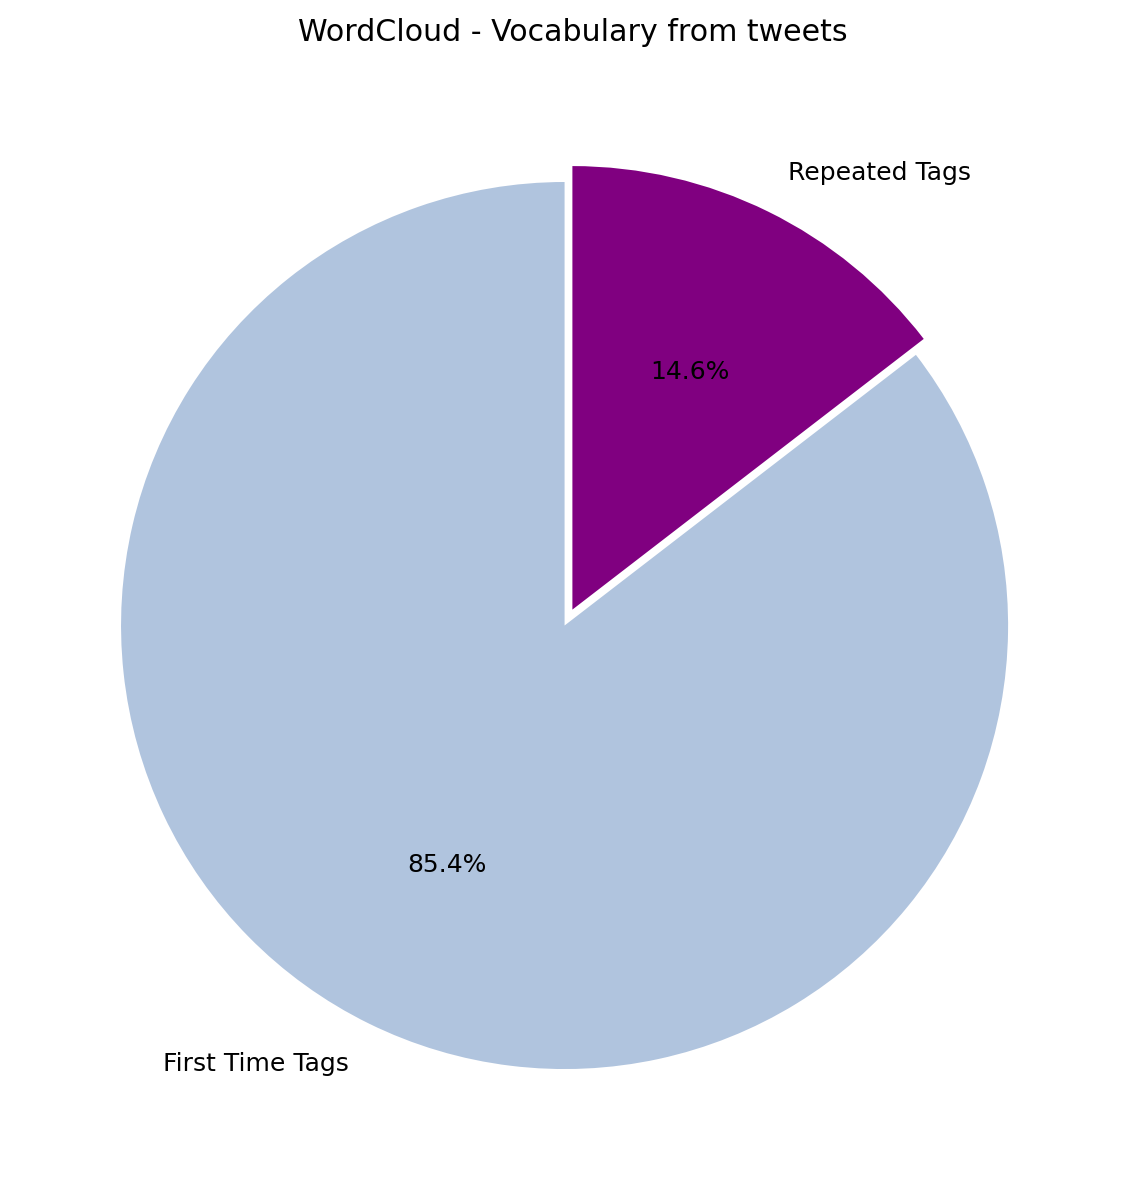

In [ ]:
# checking the numerical distribution
values = [sum(np.array(counts['message']) == 1)/len(counts['message']),
          sum(np.array(counts['message']) != 1)/len(counts['message'])]
labels = ['First Time Tags', 'Repeated Tags']
colors = ['lightsteelblue', "purple"]
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0), colors=colors)
plt.show()

In [ ]:
repeated_tags_rate = round(sum(np.array(counts['message']) > 1)*100/len(counts['message']), 1)
print(f"{repeated_tags_rate} percent of the data are from repeated tags")

14.6 percent of the data are from repeated tags


In [ ]:
first_time_tags = round(sum(np.array(counts['message']) == 1)*100/len(counts['message']), 1)
print(f"{first_time_tags} percent of the data are from first time tags")

85.4 percent of the data are from first time tags


#### Which are the most popular twitter handles? Of those, what are the comparative sentiments? 

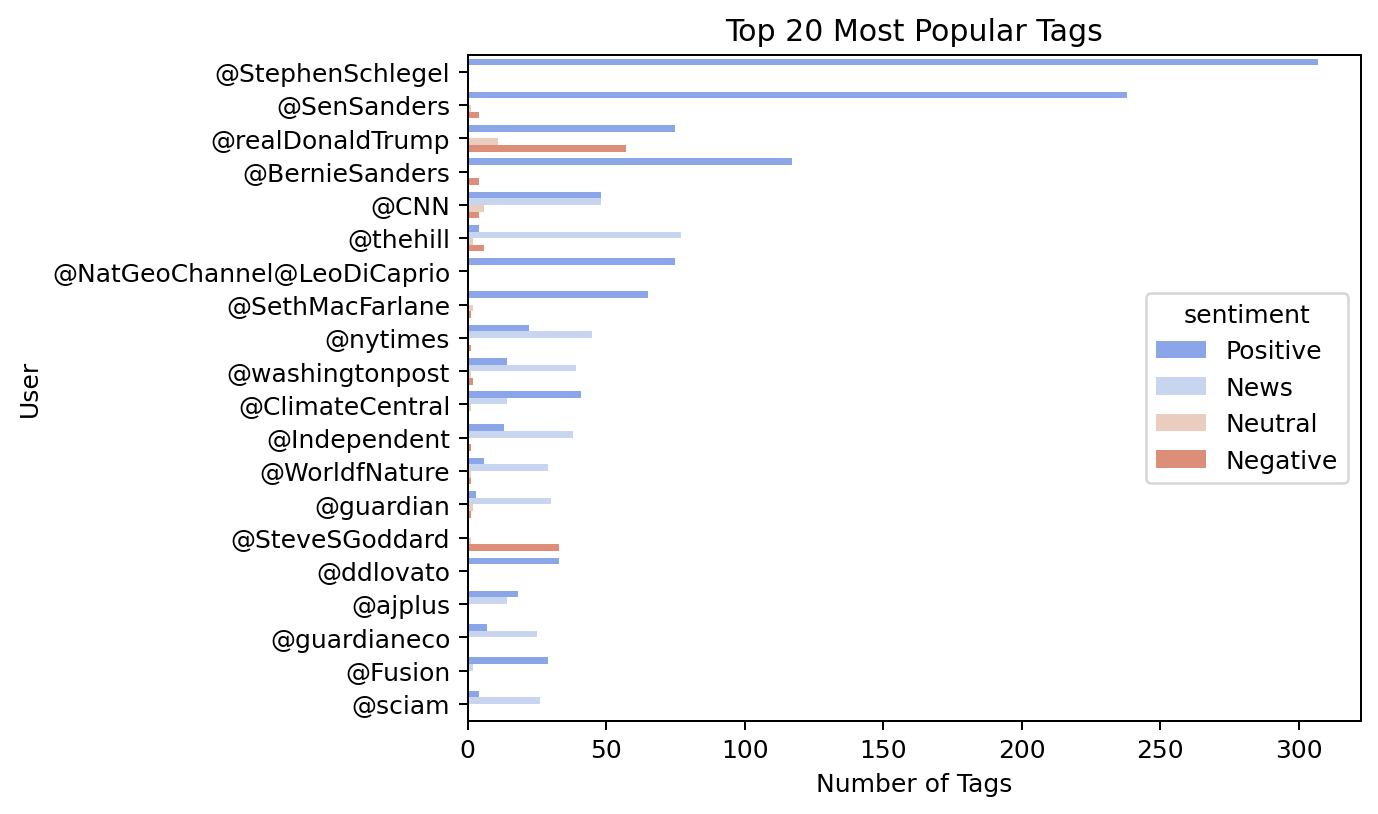

In [ ]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", hue="sentiment", data=working_df, palette='coolwarm',
              order=working_df.users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Most Popular Tags')
plt.show()

#### Lets zoom in. Per sentiment, which handle makes the top number of tweets? 

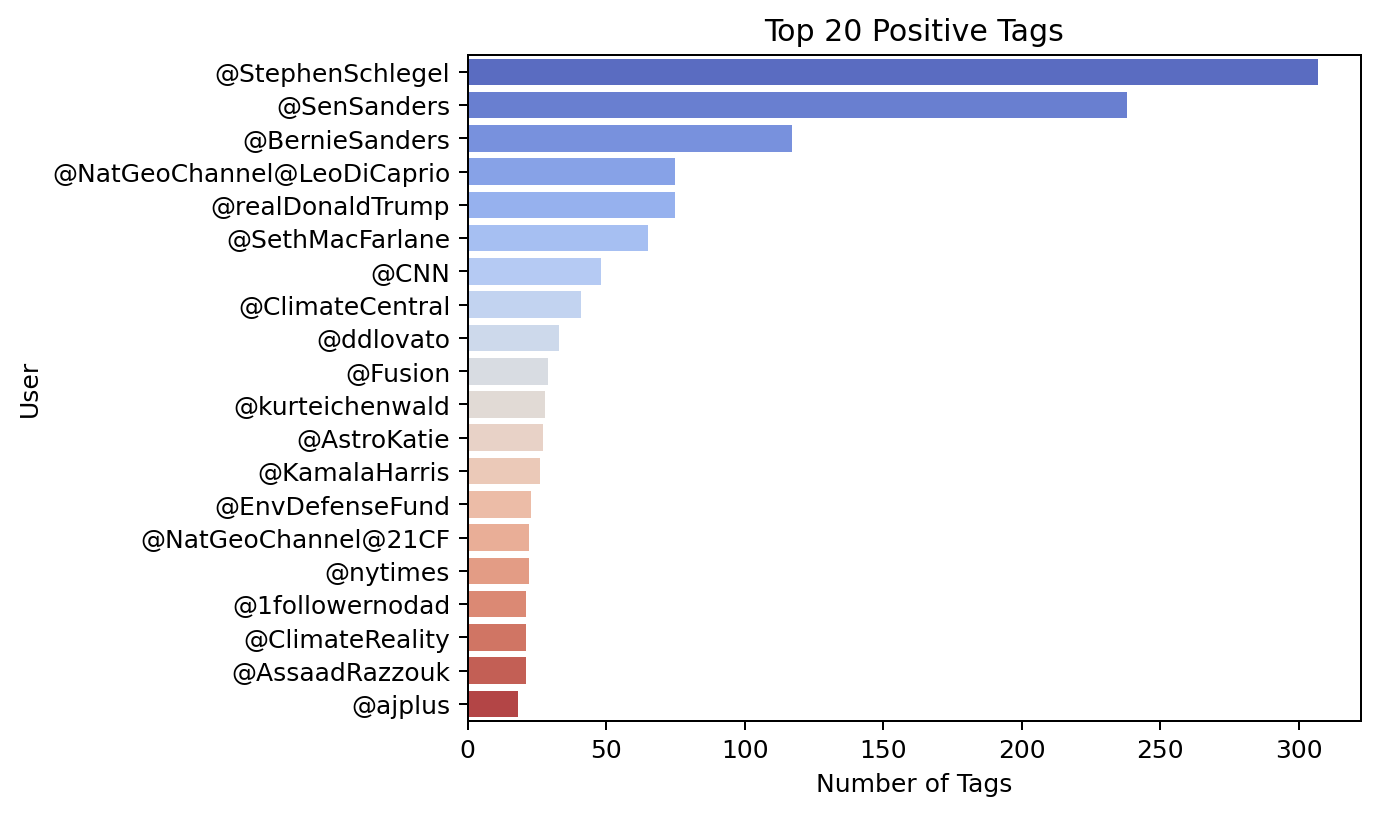

In [ ]:
# Analysis of most popular tags, sorted by popularity
sns.countplot(y="users", data=working_df[working_df['sentiment'] == 'Positive'],
              order=working_df[working_df['sentiment'] == 'Positive'].users.value_counts().iloc[:20].index,palette='coolwarm') 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Positive Tags')
plt.show()

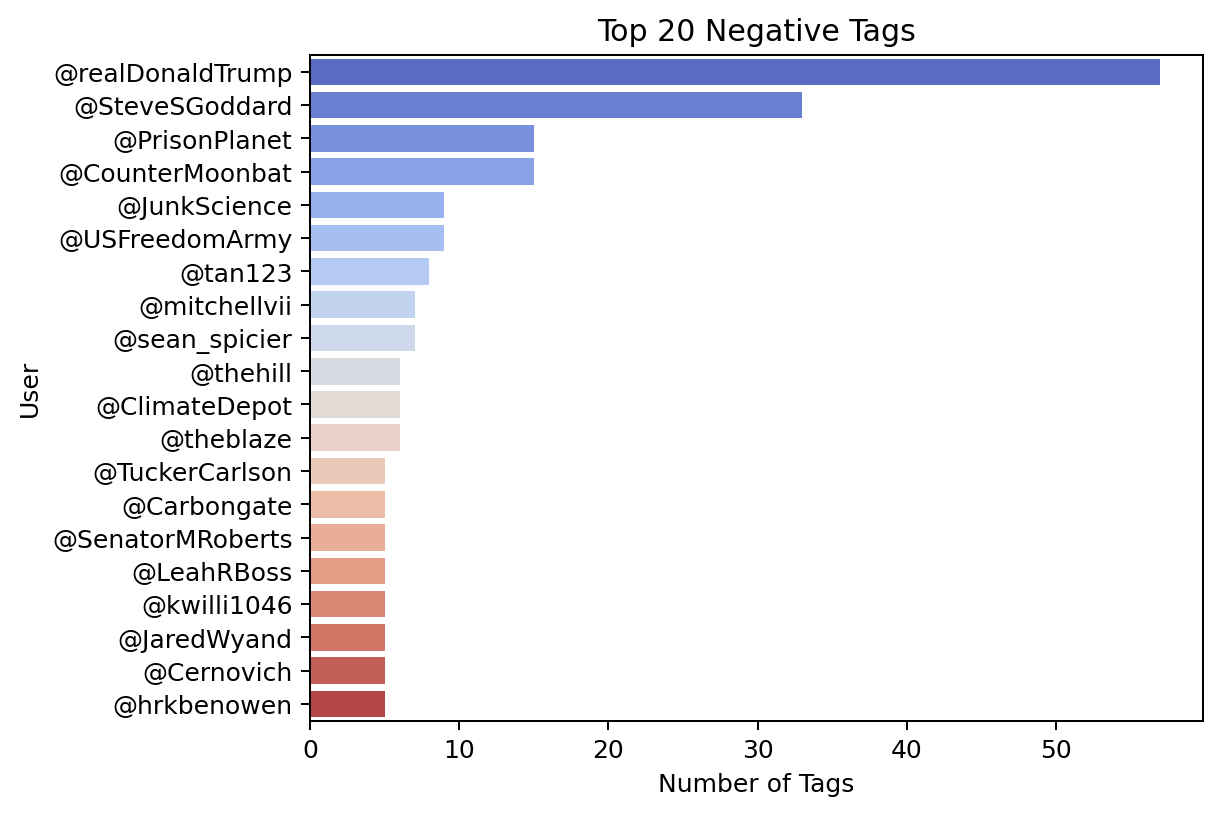

In [ ]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", data=working_df[working_df['sentiment'] == 'Negative'],
              order=working_df[working_df['sentiment'] == 'Negative'].users.value_counts().iloc[:20].index,palette='coolwarm') 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Negative Tags')
plt.show()

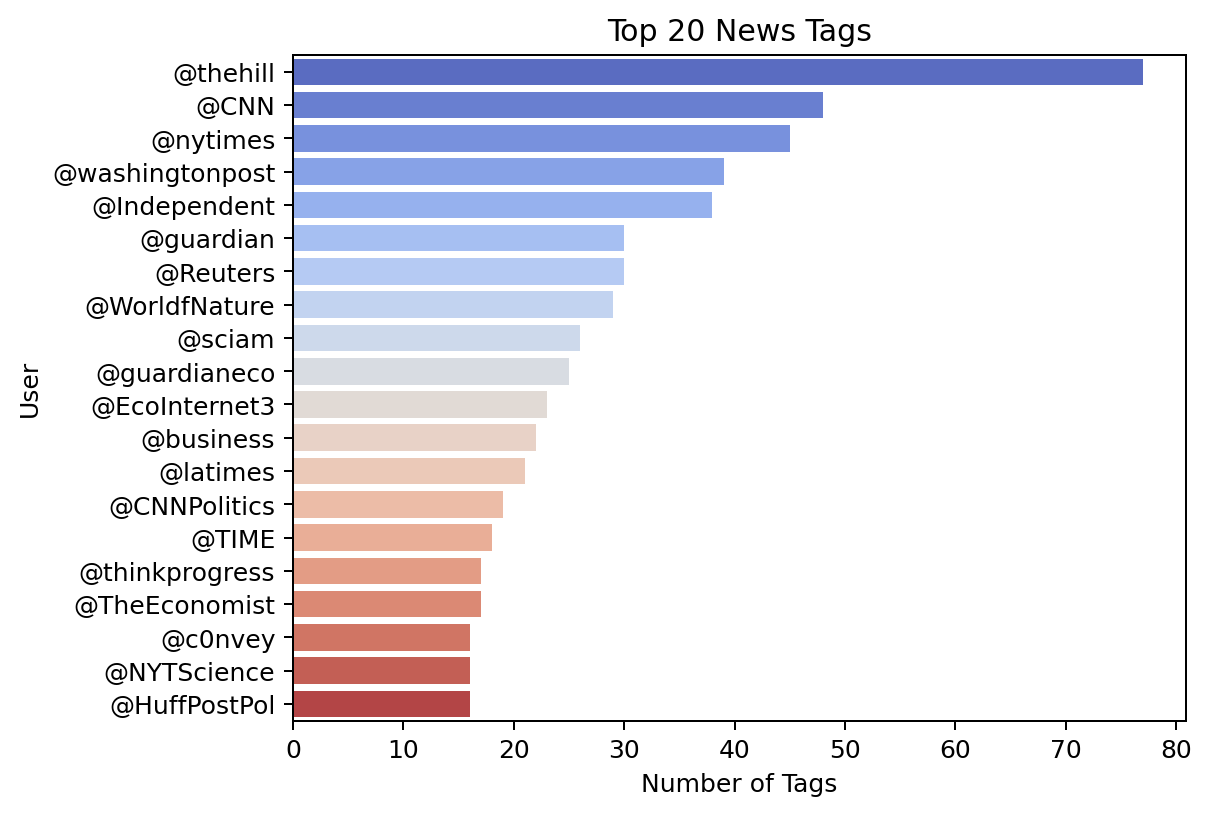

In [ ]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", data=working_df[working_df['sentiment'] == 'News'],
              order=working_df[working_df['sentiment'] == 'News'].users.value_counts().iloc[:20].index,palette='coolwarm') 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 News Tags')
plt.show()

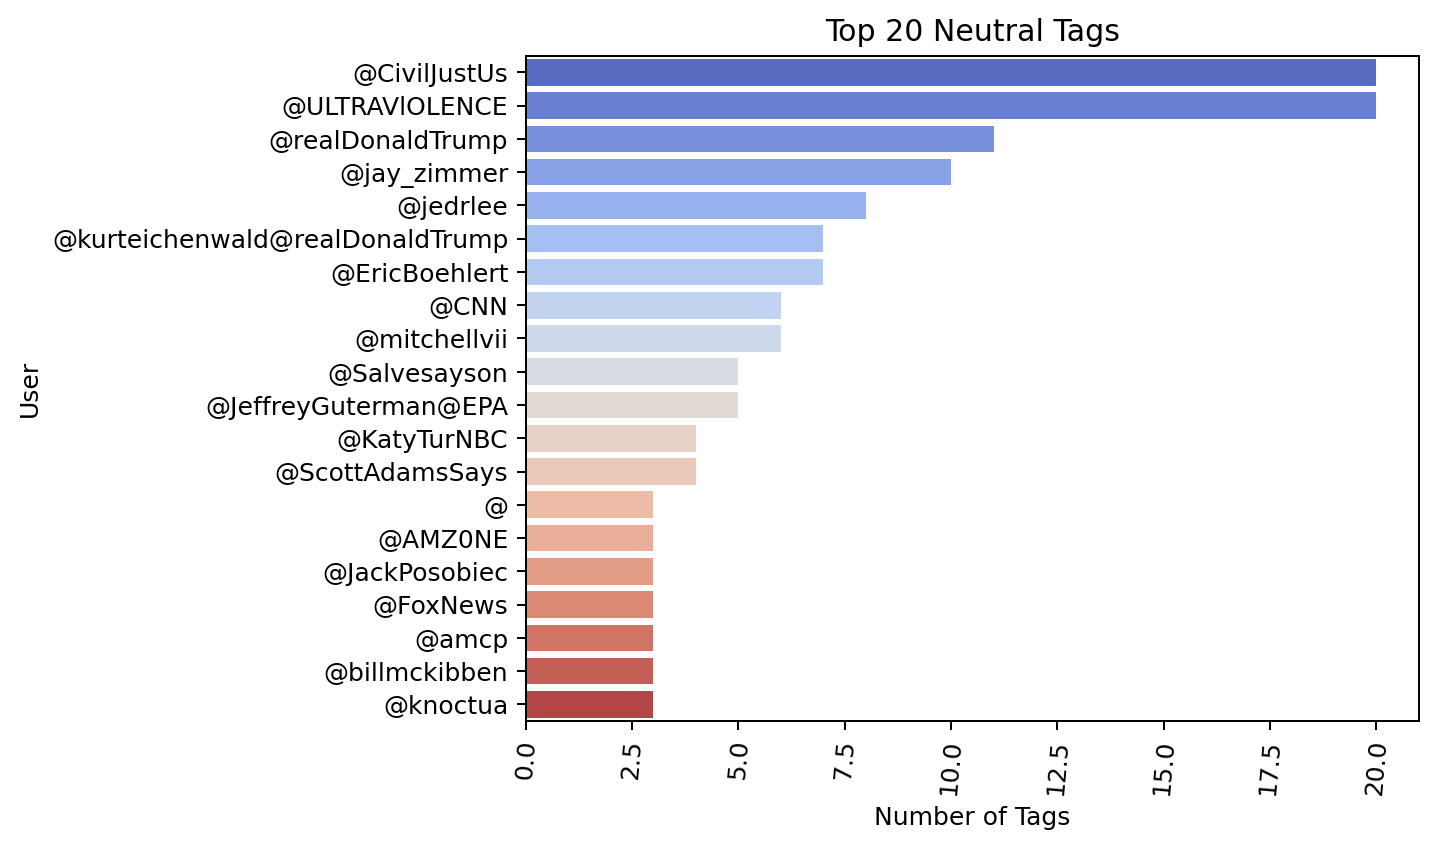

In [ ]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", data=working_df[working_df['sentiment'] == 'Neutral'],
              order=working_df[working_df['sentiment'] == 'Neutral'].users.value_counts().iloc[:20].index,palette='coolwarm') 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Neutral Tags')
plt.xticks(rotation=85)
plt.show()

In summary: 
* Stephen Schlegel is the top climate change evangalist
* Donald Trump is mostly a cliamte change hater who thinks global warming is rubbish. 
* Neswise The Hill has a lot to say. They're actually a fairly unbiased and impartial bunch, with credibility matching CNN. 

## 5. Data Preprocessing 

Data preprocessing is the process of detecting and correcting corrupt or inaccurate records from the dataset and identifying incomplete, incorrect, inaccurate or irrelevant parts of the data. We also apply database normalization which is the process of structuring a relational database in accordance with a series of normal forms in order to reduce data redundancy. Applying it will aslo help improve data integrity as it entails organizing the attributes of a dataset to ensure that their dependencies are properly enforced by database integrity constraints. Stemming and Lemmatization are techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing.

### 5.1 Re-sampling Imbalanced Data

The EDA highlighted that there is a class imbalance within the data.In training classification model, it is preferable for all classes to have a relatively even split of observations. However, in the wild, classification datasets often come with unevenly distributed observations with one class or set of classes having way more observations than others.This will negatively affecting the accuracy score of the model. Therefore resampling is necessary before training a model with this data.
There are two main approaches to random resampling for imbalanced classification; they are **oversampling** and **undersampling**.
Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.



**Combined random sampling**

Combining both random sampling methods can occasionally result in overall improved performance in comparison to the methods being performed in isolation

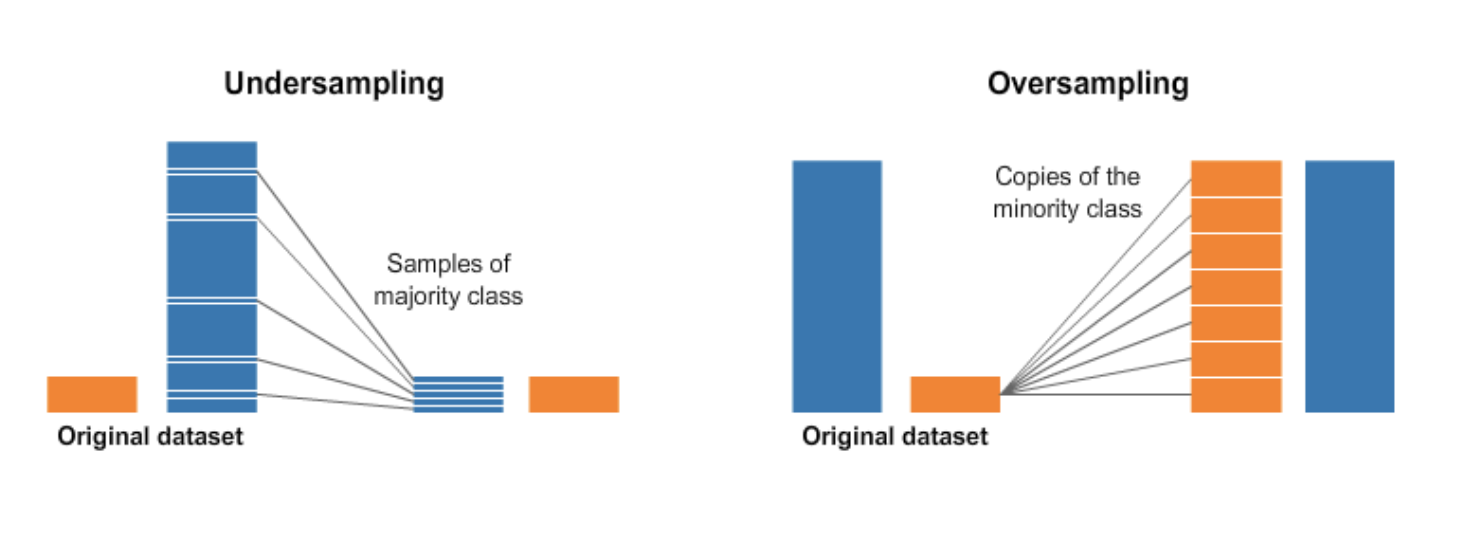

In [ ]:
from IPython.display import Image
Image('resampling.png', width="800" ,height="400")

In [ ]:
def resambling(working_df):
    """
        This function resamples by downsampling Sentiment distribution with observations greater than the sentiment size and
        upsampling the sentiment distribution with observations smaller than the sentiment size.
    """
    working_df = working_df.copy()
    sent_2 = working_df[working_df['sentiment'] == 2]  
    sent_1 = working_df[working_df['sentiment'] == 1]  
    sent_0 = working_df[working_df['sentiment'] == 0]  
    sent_n1 = working_df[working_df['sentiment'] == -1] 
    s_size = int((len(sent_1)+len(sent_2)+len(sent_0)+len(sent_n1))/4)
    # Downsampling positive sent
    rsent_1 = resample(sent_1, replace=True, n_samples= s_size, random_state=42)
    #upsampling news sent
    rsent_2 = resample(sent_2, replace=True, n_samples= s_size, random_state=42)
    #upsampling neutral sent
    rsent_0 = resample(sent_0, replace=True, n_samples=s_size, random_state=42)
    #upsampling negative sent
    rsent_n1 = resample(sent_n1, replace=True, n_samples=s_size, random_state=42)
    sampled_df = pd.concat([rsent_2, rsent_1, rsent_0, rsent_n1])
    
    return sampled_df

In [ ]:
Resampled_train_df = resambling(train_data)

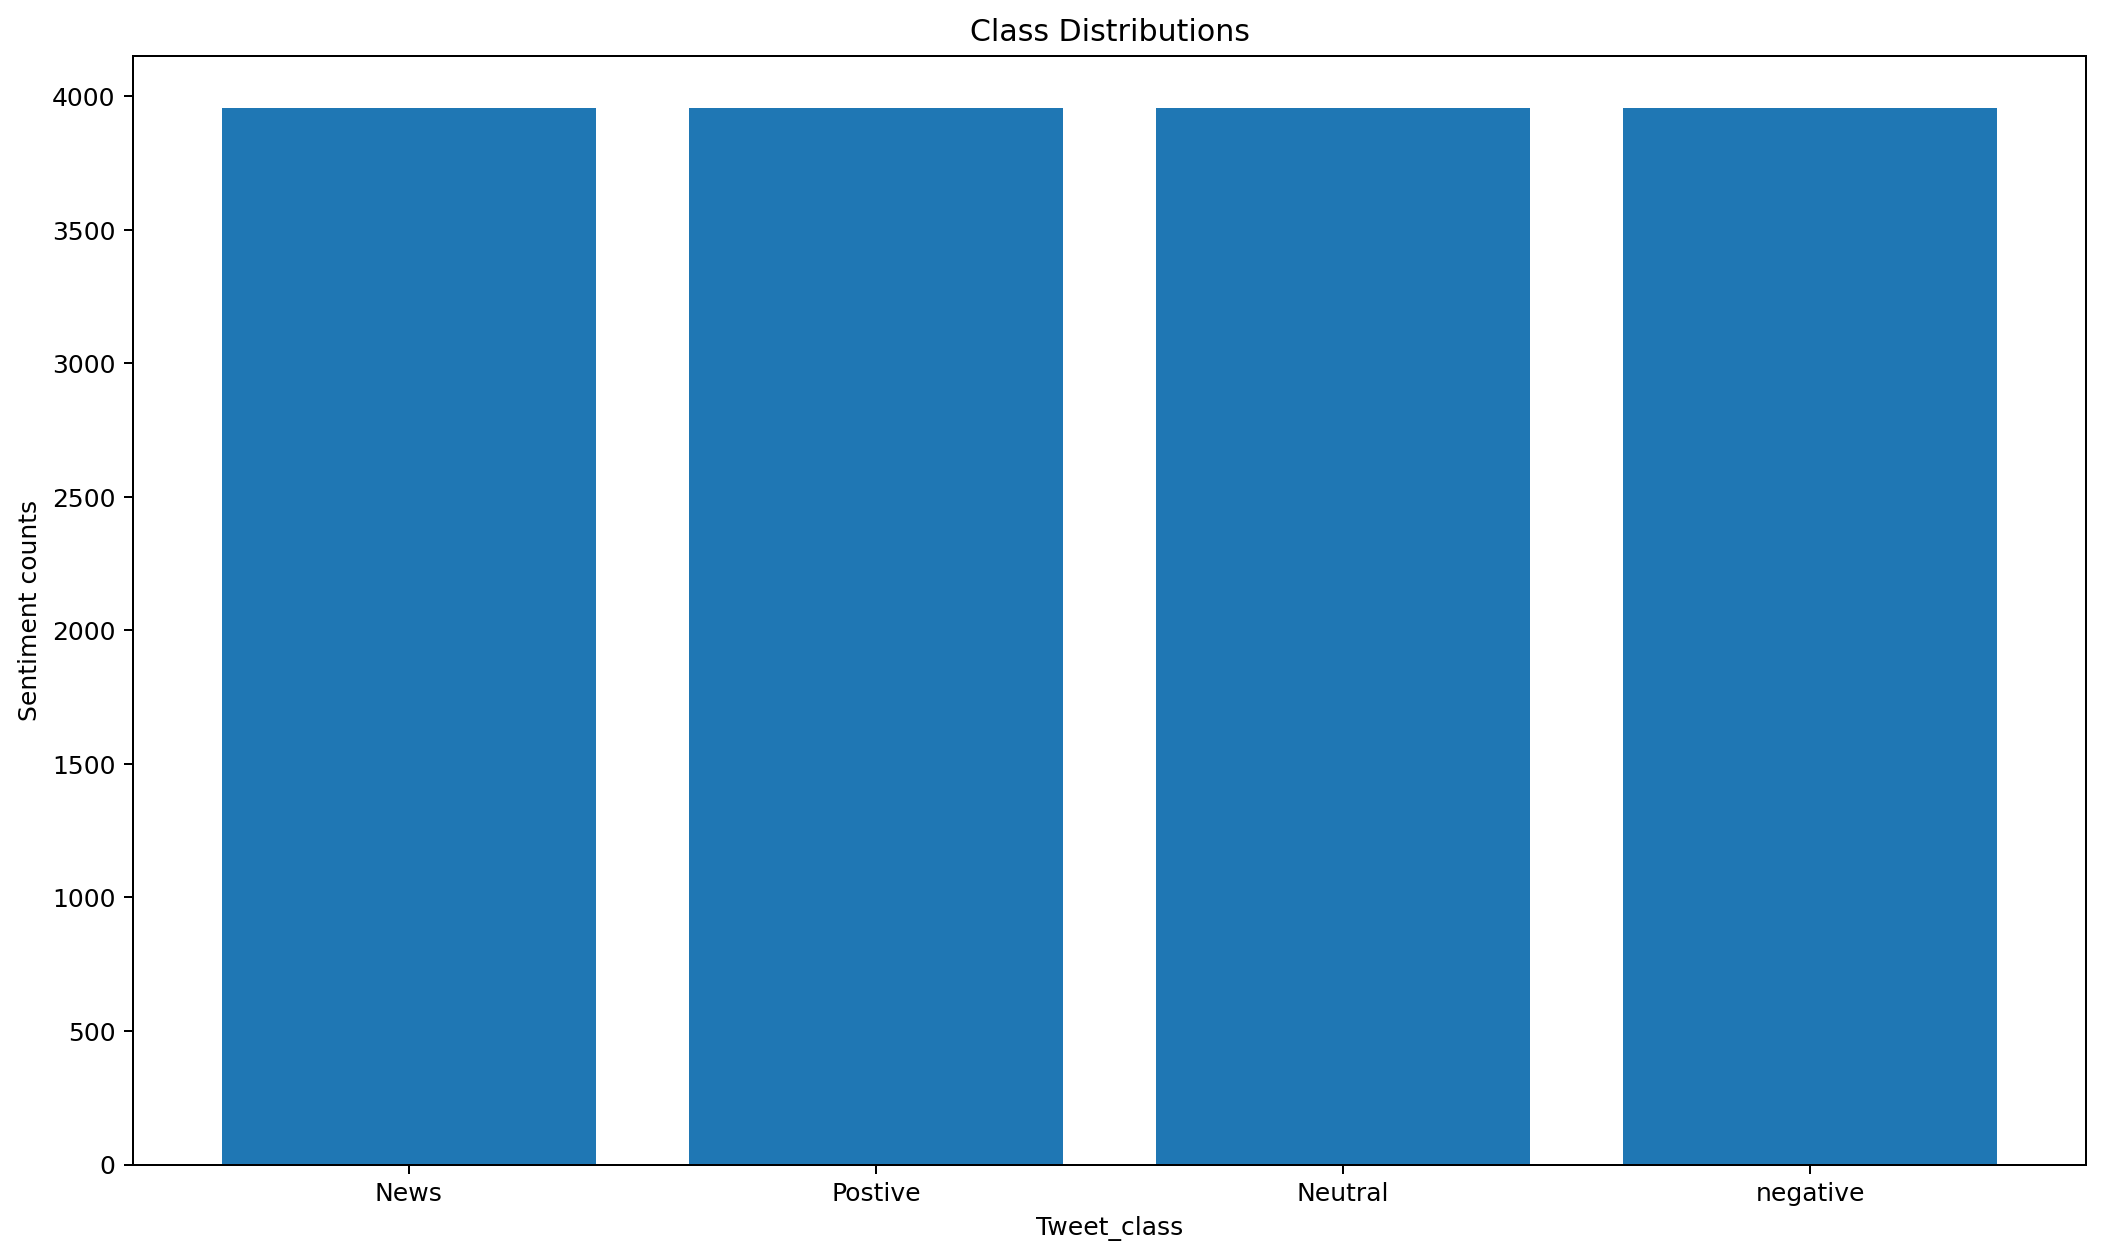

In [ ]:
news=Resampled_train_df[Resampled_train_df.sentiment == 2].shape[0]
positive =Resampled_train_df[Resampled_train_df.sentiment == 1].shape[0]
neutral=Resampled_train_df[Resampled_train_df.sentiment == 0].shape[0]
negative =Resampled_train_df[Resampled_train_df.sentiment == -1].shape[0]
#visualising
plt.figure(1,figsize=(14,8))
plt.bar(["News", "Postive", "Neutral" , "negative"],[news, positive, neutral , negative])
plt.xlabel('Tweet_class')
plt.ylabel('Sentiment counts')
plt.title('Class Distributions')
plt.show()

### 5.2 Data Cleaning

The following function is an important step in the data mining process. In our case of classification, preprocessing data means; Data cleaning, Fill in missing values, smoothing noisy data and resolving any existing inconsistencies. Success in the steps will then make it possible and some-what easy for us to perform Data integration, Data transformation, Normalization and aggregation as well as Data reduction.

### Removing noise
Convert all text data into lowercase

In [ ]:
# Lower case all words to remove noise from Capital words. Capital words may be seen as different from lower case words
working_df['message'] = working_df['message'].str.lower()
test_data['message'] = test_data['message'].str.lower()

#### Contractions

In [ ]:
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

iht = InstanceHardnessThreshold(random_state=42)
X_res, y_res = iht.fit_resample(X, y)

In [ ]:
# Dictionary of contracted words
contractions = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"wasn't": "was not",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we'll":"we will",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
}

Replace the contracted words by their expanded alternatives.

In [ ]:
# Replace contracted words with full word
working_df['message'] = [' '.join([contractions[w.lower()] if w.lower() in contractions.keys() else w for w in raw.split()]) 
                       for raw in working_df['message']]
test_data['message'] = [' '.join([contractions[w.lower()] if w.lower() in contractions.keys() else w for w in raw.split()]) 
                       for raw in test_data['message']]

#### Incomplete words

In [ ]:
# Replace shortened words with full words
short = {' BD ': ' Big Deal ',
 ' abt ':' about ',
 ' ab ': ' about ',
 ' fav ': ' favourite ',
 ' fab ': ' fabulous ',
 ' smh ': ' shaking my head ',
 ' u ': ' you ',
 ' c ': ' see ',
 ' anon ': ' anonymous ',
 ' ac ': ' aircon ',
 ' a/c ': ' aircon ',
 ' yo ':' year old ',
 ' n ':' and ',
 ' nd ':' and ',
 ' 2 ': ' to ',
 ' w ': ' with ',
 ' w/o ': ' without ',
 ' r ': ' are ',
 ' rip ':' rest in peace ',
 ' 4 ' : ' for ',
' BF ': ' Boyfriend ',
' BRB ': ' Be Right Back ',
' BTW ': ' By The Way ',
' GF ': ' Girlfriend ',
' HBD ': ' Happy Birthday ',
' JK ': ' Just Kidding ',
' K ':' Okay ',
' LMK ': ' Let Me Know ',
' LOL ': ' Laugh Out Loud ',
' NBC ': ' Nobody Cares Though ',
' NTW ': ' Not To Worry ',
' OTD ': ' Of The Day ',
' OOTD ': ' Outfit Of The Day ',
' QOTD ': ' Quote of the Day ',
' FOTD ': ' Find Of the Day ',
' POIDH ': ' Pictures Or It Did ntt Happen ',
' YOLO ': ' You Only Live Once ',
' AFAIK ': ' As Far As I Know ',
' DGYF ': ' Dang Girl You Fine ',
' FWIW ': ' For What It is Worth ',
' IDC ': ' I Do not Care ',
' IDK ': ' I Do not Know ',
' IIRC ': ' If I Remember Correctly ',
' IMHO ': ' In My Honest Opinion ',
' IMO ': ' In My Opinion ',
' Jelly ': ' Jealous ',
' Jellz ': ' Jealous ',
' JSYK ': ' Just So You Know ',
' LMAO ': ' Laughing My Ass Off ',
' LMFAO ': ' Laughing My Fucking Ass Off ',
' NTS ': ' Note to Self ',
' ROFL ': ' Rolling On the Floor Laughing ',
' ROFLMAO ': ' Rolling On the Floor Laughing My Ass Off ',
' SMH ': ' Shaking My Head ',
' TBH ': ' To Be Honest ',
' TL;DR ':  ' Too Long; Did not Read ',
' TLDR ':  ' Too Long; Did not Read ',
' YGTR ': ' You Got That Right ',
' AYKMWTS ': ' Are You Kidding Me With This Shit ',
' BAMF ': ' Bad Ass Mother Fucker ',
' FFS ': ' For Fuck Sake ',
' FML ': ' Fuck My Life ',
' HYFR ': ' Hell Yeah Fucking Right ',
' IDGAF ': ' I Do not Give A Fuck ',
' NFW ': ' No Fucking Way ',
' PITA ': ' Pain In The Ass ',
' POS ': ' Piece of Shit ',
' SOL ': ' Shit Outta Luck ',         
' STFU ': ' Shut the Fuck Up ',
' TF ': ' The Fuck ',
' WTF ': ' What The Fuck ',
' BFN ': ' Bye For Now ',
' CU ': ' See You ',
' IC ': ' I see ',
' CYL ': ' See You Later ',
' GTG ': ' Got to Go ',
' OMW ': ' On My Way ',
' RN ': ' Right Now ',
' TTYL ': ' Talk To You Later ',
' TYT ': ' Take Your time ',
' CC ': ' Carbon Copy ',
' CX ': ' Correction ',
' DM ': ' Direct Message ',
' FB ': ' Facebook ',
' FBF ': ' Flash-Back Friday ',
' FF ': ' Follow Friday ',
' HT ': ' Tipping my hat ',
' H/T ': ' Tipping my hat ',
' IG ': ' Instagram ',
' Insta ': ' Instagram ',
' MT ':' Modified Tweet ',
' OH ': ' Overheard ',
' PRT ': ' Partial Retweet ',
' RT ': ' Retweet ',
'rt ' : ' retweet ',
' SO ':' Shout Out ',
' S/O ': ' Shout Out ',
' TBT ': ' Throw-Back Thursday ',
' AWOL ': ' Away While Online ',
' BFF ': ' Best Friend Forever ',
' NSFW ': ' Not Safe For Work ',
' OG ': ' Original Gangster ',
' PSA ': ' Public Service Announcement ',
' PDA ': ' Public Display of Affection ',        
' HA ':' laugh ',
' MYOB ': ' Mind Your Own Business ',
' NBD ': ' No Big Deal ',
' NVM ': ' Nevermind ',
' Obv ':' Obviously ',
' Obvi ':' Obviously ',
' OMG ': ' Oh My God ',
' Pls ': ' Please ',
' Plz ': ' Please ',
' Q ': ' Question ', 
' QQ ': ' Quick Question ',
' RLY ': ' Really ',
' SRLSY ': ' Seriously ',
' TMI ': ' Too Much Information ',
' TY ': ' Thank You, ',
' TYVM ': ' Thank You Very Much ',
' YW ': ' You are Welcome ',
' FOMO ': ' Fear Of Missing Out ',
' FTFY ': ' Fixed This For You ',
' FTW ': ' For The Win ',
' FYA ': ' For Your Amusement ',
' FYE ': ' For Your Entertainment ',
' GTI ': ' Going Through It ',
' HTH ': ' Here to Help ',
' IRL ': ' In Real Life ',
' nt  ': ' not ',
' ICYMI ': ' In Case You Missed It ',
' ICYWW ': ' In Case You Were Wondering '}
short = dict((key.lower(), value.lower()) for key,value in short.items())

Replace the shortened words by their full alternatives.

In [ ]:
# Replacing shortened words with full words
for word in short.keys():
    working_df['message'] = working_df['message'].apply(lambda x: re.sub(word,short[word],x))
for word in short.keys():
    test_data['message'] = test_data['message'].apply(lambda x: re.sub(word,short[word],x))

### Removing Stop words

In [ ]:
stopwordlist = stopwords.words('english')
stopwordlist = set(stopwordlist)
def removing_stopwords(data):
    return " ".join([word for word in str(data).split() if word not in stopwordlist])
working_df['message'] = working_df['message'].apply(lambda x: removing_stopwords(x))
test_data['message'] = test_data['message'].apply(lambda x: removing_stopwords(x))

In [ ]:
working_df.head()

,sentiment,message,tweetid,users,hashtags
0,Positive,polyscimajor epa chief think carbon dioxide ma...,625221,@mashable,NaN
1,Positive,like lack evidence anthropogenic global warming,126103,NaN,NaN
2,News,retweet @rawstory: researchers say three years...,698562,@RawStory,NaN
3,Positive,#todayinmaker# wired : 2016 pivotal year war c...,573736,NaN,#TodayinMaker #
4,Positive,"retweet @soynoviodetodas: 2016, racist, sexist...",466954,@SoyNovioDeTodas,#ElectionNight


### Removing emojis

In [ ]:
def remove_emoji(words):
    emojis = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        "]+", flags=re.UNICODE)
    return emojis.sub(r'', words)
working_df['message'] = working_df['message'].apply(lambda x: remove_emoji(x))
test_data['message'] = test_data['message'].apply(lambda x: remove_emoji(x))

### Removing URLs

In [ ]:
def removing_URL(data):
    """This function take a string as an input and removes any url that are present in that string"""
    
    return re.sub(r"http\S+", "", data) 
working_df['message'] = working_df['message'].apply(lambda x: removing_URL(x))
test_data['message'] = test_data['message'].apply(lambda x: removing_URL(x))

### Removing punctuations

In [ ]:
def removing_punctuations(tokenized_words):
    """This function take a string/list as an input and removes all the punctuations"""

    words = str.maketrans('', '', string.punctuation)
    return tokenized_words.translate(words)  
working_df['message'] = working_df['message'].apply(lambda x: removing_punctuations(x))
test_data['message'] = test_data['message'].apply(lambda x: removing_punctuations(x))

Removing repeating characters, numbers, other text in messages

In [ ]:
def removing_repeating_char(data):
    return re.sub(r'(.)1+', r'1', data)
def removing_numbers(data):
    return re.sub('[0-9]+', '', data)
def remove_other(text):
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text
def clean_data(tokens):
    """Clean each word from list of tokenized words"""
    tokens = removing_repeating_char(tokens)
    tokens = removing_numbers(tokens)
    tokens = remove_other(tokens)
    return tokens

In [ ]:
working_df['message'] = working_df['message'].apply(lambda x: clean_data(x))
test_data['message'] = test_data['message'].apply(lambda x: clean_data(x))

In [ ]:
working_df.shape, test_data.shape

((15819, 5), (10546, 2))

In [ ]:
working_df.head()

,sentiment,message,tweetid,users,hashtags
0,Positive,polyscimajor epa chief think carbon dioxide ma...,625221,@mashable,NaN
1,Positive,like lack evidence anthropogenic global warming,126103,NaN,NaN
2,News,retweet rawstory researchers say three years a...,698562,@RawStory,NaN
3,Positive,todayinmaker wired pivotal year war climate ...,573736,NaN,#TodayinMaker #
4,Positive,retweet soynoviodetodas racist sexist climate...,466954,@SoyNovioDeTodas,#ElectionNight


### Tokenisation

In [ ]:
from nltk import TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()
working_df['message'] = working_df['message'].apply(tokeniser.tokenize)

In [ ]:
working_df.tail()

,sentiment,message,tweetid,users,hashtags
15814,Positive,"[retweet, ezlusztig, took, material, global, w...",22001,@ezlusztig,NaN
15815,News,"[retweet, washingtonpost, climate, change, cou...",17856,@washingtonpost,NaN
15816,Neutral,"[notiven, rt, nytimesworld, what, trump, actua...",384248,NaN,NaN
15817,Negative,"[retweet, sarasmiles, hey, liberals, climate, ...",819732,@sara8smiles,#Agenda2030
15818,Neutral,"[retweet, chetcannon, kurteichenwalds, climate...",806319,@Chet_Cannon@kurteichenwald,NaN


### Lemmatization

In [ ]:
def lemmas(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

In [ ]:
lemmatizer = WordNetLemmatizer()
working_df['lemma'] = working_df['message'].apply(lemmas, args=(lemmatizer, ))

In [ ]:
working_df.shape, test_data.shape

((15819, 6), (10546, 2))

In [ ]:
working_df.head(10)

,sentiment,message,tweetid,users,hashtags,lemma
0,Positive,"[polyscimajor, epa, chief, think, carbon, diox...",625221,@mashable,NaN,"[polyscimajor, epa, chief, think, carbon, diox..."
1,Positive,"[like, lack, evidence, anthropogenic, global, ...",126103,NaN,NaN,"[like, lack, evidence, anthropogenic, global, ..."
2,News,"[retweet, rawstory, researchers, say, three, y...",698562,@RawStory,NaN,"[retweet, rawstory, researcher, say, three, ye..."
3,Positive,"[todayinmaker, wired, pivotal, year, war, clim...",573736,NaN,#TodayinMaker #,"[todayinmaker, wired, pivotal, year, war, clim..."
4,Positive,"[retweet, soynoviodetodas, racist, sexist, cli...",466954,@SoyNovioDeTodas,#ElectionNight,"[retweet, soynoviodetodas, racist, sexist, cli..."
5,Positive,"[worth, read, whether, believe, climate, change]",425577,NaN,NaN,"[worth, read, whether, believe, climate, change]"
6,Positive,"[retweet, thenation, mike, pence, doesn’t, bel...",294933,@thenation,NaN,"[retweet, thenation, mike, penny, doesn’t, bel..."
7,Positive,"[retweet, makeandmendlife, six, big, things, t...",992717,@makeandmendlife,NaN,"[retweet, makeandmendlife, six, big, thing, to..."
8,Positive,"[aceofspadeshq, yo, nephew, inconsolable, want...",664510,@AceofSpadesHQ,NaN,"[aceofspadeshq, yo, nephew, inconsolable, want..."
9,Positive,"[retweet, paigetweedy, offense…, like…, believ...",260471,@paigetweedy,NaN,"[retweet, paigetweedy, offense…, like…, believ..."


### 5.4. Feature Engineering and Selection

In [ ]:
X_res = train_data['message']
y_res = train_data['sentiment']

### Splitting the data into Train and Validation Set
We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.



In [ ]:
# Splitting of Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.01, random_state=42)

# 6. Modelling

# Building Models

Now we are finally ready, and we can train our models

We try for this project 10 models: 

<br> **1) Logistic Regression** 
<br> **2) Linear SVC Model**
<br> **3) SVC Model**
<br> **4) Decision Tree Classifier**
<br> **5) Random Forest Classifier** 
<br> **6) MLP Classifier**
<br> **7) KNeighbors Classifier**
<br> **8) Multinomial NB** 
<br> **9) Complement NB**
<br> **10) SGD Classifier**

We feed the model both with the data (X_train) and the answers for that data (y_train)

## Model Evaluation
Evaluating performance of the machine learning model that we have built is an essential part of any machine learning project. Performance of our model is done using some evaluation metrics.

There are so many evaluation metrics to use for regression problem, naming some - Accuracy Score, F1 Score, Precision, Recall etc. However, **Accuracy Score** is the metric for this challenge. 

### Before Oversampling 

In [ ]:
# List all the models

classifiers = [LinearSVC(random_state=42),
                SVC(),
                DecisionTreeClassifier(),
                RandomForestClassifier(n_estimators=100, max_depth=1,
                                     random_state=0, class_weight="balanced"),
                MLPClassifier(alpha=1e-5,
                             hidden_layer_sizes=(5, 2),
                             random_state=42),
                LogisticRegression(random_state=5,
                                  multi_class='ovr',
                                  n_jobs=1,
                                  C=1
                                  ),
                KNeighborsClassifier(n_neighbors=5),
                MultinomialNB(),
                ComplementNB(),
                SGDClassifier(loss='hinge',
                             penalty='l2',
                             alpha=1e-3,
                             random_state=42,
                             max_iter=5,
                             tol=None)
               ]

In [ ]:
# Creating Function for Model Building

def models_building(classifiers, X_train, y_train, X_val, y_val):
    """
    This function takes in a list of classifiers
    and both the train and validation sets
    and return a summary of F1-score and
    processing time as a dataframe

    Input:
    classifiers: a list of classifiers to train
                 datatype: list
    X_train: independent variable for training
             datatype: series
    y_train: dependent variable for training
             datatype: series
    X_val: independent variable for validation
           datatype: series
    y_val: dependent variable for validation
           datatype: series

    Output:
    model_summary: F1 Score for all the classifiers
                   datatype: dataframe
    """

    models_summary = {}

    # Pipeline to balance the classses and then to build the model
    for clf in classifiers:
        clf_text = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                                       max_df=0.95,
                                                       ngram_range=(1, 2),
                                                       analyzer='word')),
                             ('clf', clf)])

        # Logging the Execution Time for each model
        start_time = time.time()
        clf_text.fit(X_train, y_train)
        predictions = clf_text.predict(X_val)
        run_time = time.time()-start_time

        # Output for each model
        models_summary[clf.__class__.__name__] = {
            'F1-Macro': metrics.f1_score(y_val,
                                         predictions,
                                         average='macro'),
            'F1-Accuracy': metrics.f1_score(y_val, predictions,
                                            average='micro'),
            'F1-Weighted': metrics.f1_score(y_val,
                                            predictions,
                                            average='weighted'),
            'Execution Time': run_time}

    return pd.DataFrame.from_dict(models_summary, orient='index')


In [ ]:
# Execution of the Classifiers
classifiers_df = models_building(classifiers, X_train, y_train, X_val, y_val)
ordered_df = classifiers_df.sort_values('F1-Macro', ascending=False)
ordered_df.style.background_gradient(cmap='Blues')

,F1-Macro,F1-Accuracy,F1-Weighted,Execution Time
LinearSVC,0.744533,0.798742,0.792909,0.653283
ComplementNB,0.667822,0.761006,0.743122,0.468747
KNeighborsClassifier,0.666610,0.698113,0.700713,0.545570
DecisionTreeClassifier,0.661683,0.691824,0.690982,4.553828
SVC,0.655616,0.761006,0.736107,71.952631
LogisticRegression,0.632623,0.767296,0.738822,1.647730
SGDClassifier,0.440210,0.672956,0.609118,0.500635
MultinomialNB,0.437151,0.691824,0.613552,0.469745
MLPClassifier,0.383137,0.679245,0.589662,56.015702
RandomForestClassifier,0.354645,0.377358,0.369952,0.647269


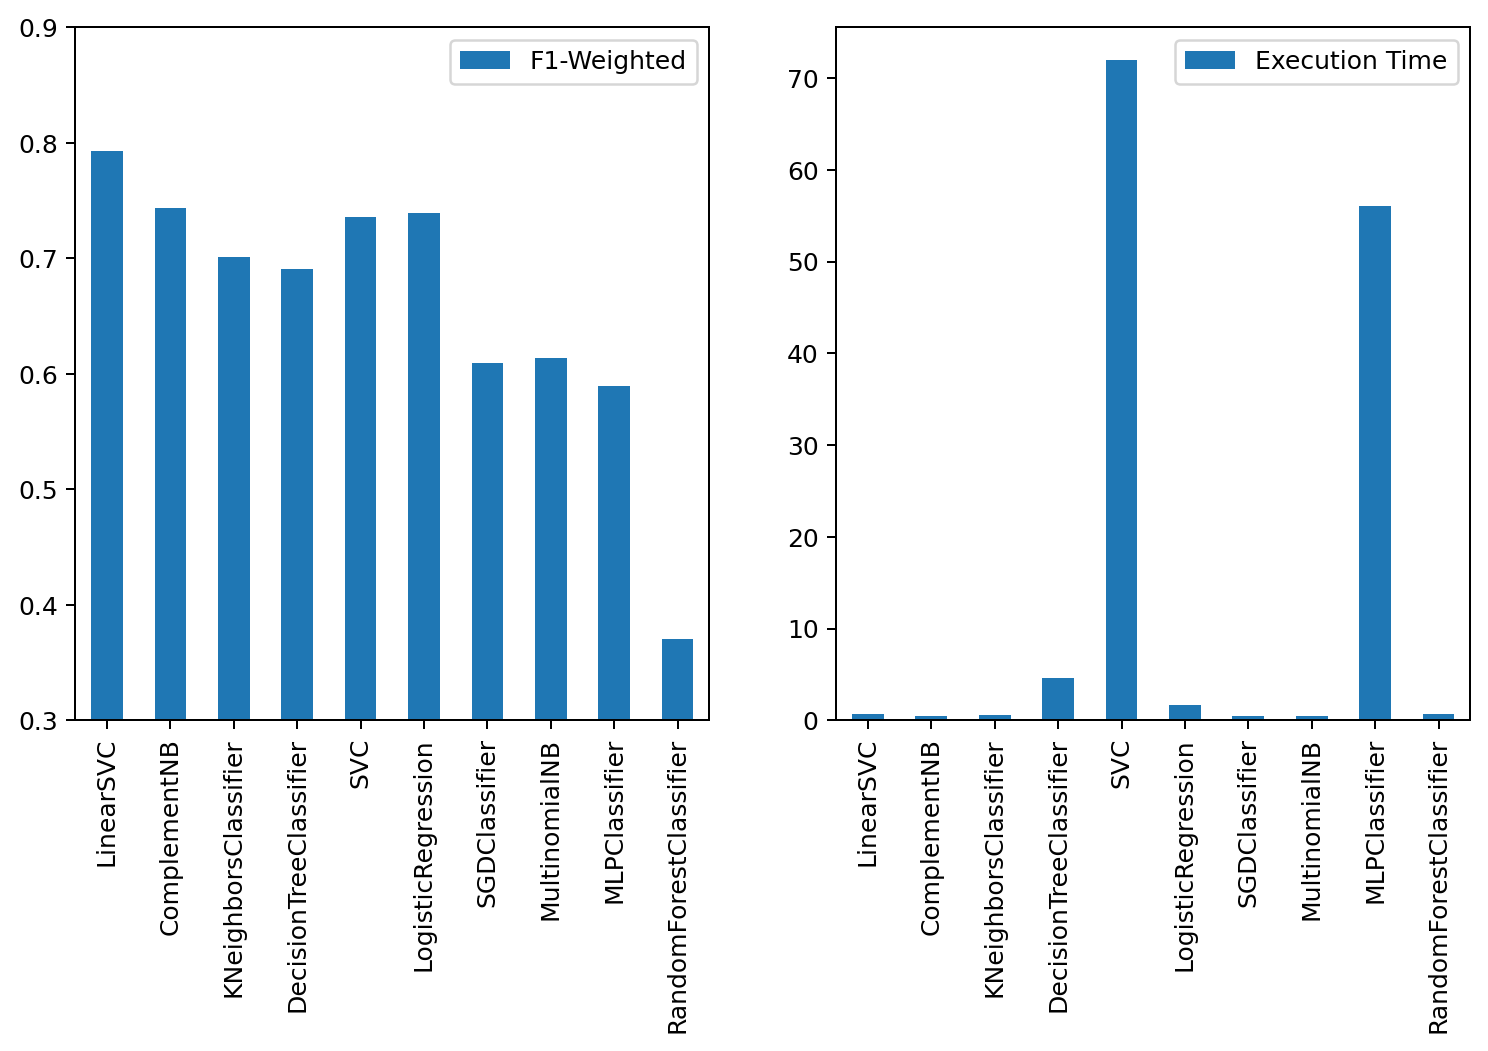

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#ordered_df.sort_values('F1-Weighted', ascending=False, inplace=True)
ordered_df.plot(y=['F1-Weighted'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.3,0.9])
ordered_df.plot(y='Execution Time', kind='bar', ax=ax[1])
plt.show()

## Re-run models individually, with oversampling 

### Refit Vectorizer 

In [ ]:
# building and fitting the vectorizer
df_train = train_data.copy()
vect = TfidfVectorizer(ngram_range=(1,3), sublinear_tf=True, smooth_idf = True, min_df = 1, max_df = 0.95) 
                       
# transforming the 'clean_txt' column
X_clean_txt = vect.fit_transform(df_train.message) 

In [ ]:
# Use these values for 'X' and 'y' in 'train_test_split':
y = df_train['sentiment']
X = df_train['message']

In [ ]:
# Splitting the previously defined features and label of your dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_clean_txt, y, test_size=0.2, random_state=42)

###  Over Sampling

In [ ]:
# Over sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train2, y_train2 = smote.fit_resample(X_clean_txt, y)
print(sorted(Counter(y_train).items()))

[(-1, 1286), (0, 2326), (1, 8438), (2, 3610)]


In [ ]:
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(34120, 311915)
(3164, 311915)
(34120,)
(3164,)


#### Vectorising test data

In [ ]:
clean_message_tfidf = vect.transform(test_data['message'])

### 1) Logistic Regression Model

In [ ]:
start = timeit.default_timer()

lr = LogisticRegression(random_state=42)

# Train the model
lr.fit(X_train2, y_train2)

pred = lr.predict(X_test2)

# Validate the Model - how well did the model do? 
print('F1 Score is: ', f1_score(y_test2, pred, average='weighted')) 

stop = timeit.default_timer()
execution_time_linear = stop - start

print("Program Executed in "+str(execution_time_linear) + " seconds") # It returns time in seconds

F1 Score is:  0.9644792139544709
Program Executed in 16.152677999999923 seconds


### 2) Linear SVC Model  

In [ ]:
start = timeit.default_timer()

linear_svc = LinearSVC()

#train the model 
linear_svc.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_svc = linear_svc.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_svc, average='weighted')) 

stop = timeit.default_timer()
execution_time_linear_svc = stop - start

print("Program Executed in "+str(execution_time_linear_svc) + " seconds") # It returns time in seconds

F1 Score is:  0.9993677227225423
Program Executed in 1.5070752999999968 seconds


### 3) SVC Model 

In [ ]:
start = timeit.default_timer()

svcc = SVC()

#train the model 
svcc.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_svcc = svcc.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_svcc, average='weighted')) 

stop = timeit.default_timer()
execution_time_svc = stop - start

print("Program Executed in "+str(execution_time_svc) + " seconds") # It returns time in seconds

F1 Score is:  0.9984190861933933
Program Executed in 767.3231358000003 seconds


### 4) Decision Tree Classifier

In [ ]:
start = timeit.default_timer()

dtc = DecisionTreeClassifier()

#train the model 
dtc.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_dtc = dtc.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_dtc, average='weighted')) 

stop = timeit.default_timer()
execution_time_dtc = stop - start

print("Program Executed in "+str(execution_time_dtc) + " seconds") # It returns time in seconds

F1 Score is:  0.999052004838008
Program Executed in 30.080069999999978 seconds


### 5) Random Forest Classifier 

In [ ]:
start = timeit.default_timer()

rfc = RandomForestClassifier(n_estimators=100, max_depth=2,
                                     random_state=0, class_weight="balanced")

#train the model 
rfc.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_rfc = rfc.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_rfc, average='weighted')) 

stop = timeit.default_timer()
execution_time_rfc = stop - start

print("Program Executed in "+str(execution_time_rfc) + " seconds") # It returns time in seconds

F1 Score is:  0.4736219682284337
Program Executed in 0.5820384999997259 seconds


### 6) MLP Classifier  

In [ ]:
start = timeit.default_timer()

mlp = MLPClassifier(alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=42)
    
#train the model 
mlp.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_mlp = mlp.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_mlp, average='weighted')) 

stop = timeit.default_timer()
execution_time_mlp = stop - start

print("Program Executed in "+str(execution_time_mlp) + " seconds") # It returns time in seconds

F1 Score is:  0.9993678649172268
Program Executed in 483.49939429999995 seconds


### 7) KNeighbors Classifier 

In [ ]:
start = timeit.default_timer()

knn = KNeighborsClassifier(n_neighbors=5)

#train the model 
knn.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_knn = knn.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_knn, average='weighted')) 

stop = timeit.default_timer()
execution_time_knn = stop - start

print("Program Executed in "+str(execution_time_knn) + " seconds") # It returns time in seconds

F1 Score is:  0.4879871490015944
Program Executed in 2.7821709999998347 seconds


### 8) MultinomialNB 

In [ ]:
start = timeit.default_timer()

mnb = MultinomialNB()

#train the model 
mnb.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_mnb = mnb.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_mnb, average='weighted')) 

stop = timeit.default_timer()
execution_time_mnb = stop - start

print("Program Executed in "+str(execution_time_mnb) + " seconds") # It returns time in seconds

F1 Score is:  0.948854781996979
Program Executed in 0.047643199999583885 seconds


### 9) ComplementNB 

In [ ]:
start = timeit.default_timer()

cnb = ComplementNB()

#train the model 
cnb.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_cnb = cnb.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_cnb, average='weighted')) 

stop = timeit.default_timer()
execution_time_cnb = stop - start

print("Program Executed in "+str(execution_time_cnb) + " seconds") # It returns time in seconds

F1 Score is:  0.9539088138571259
Program Executed in 0.04744529999970837 seconds


### 10) SGDClassifier

In [ ]:
start = timeit.default_timer()

sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)

#train the model 
sgd.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_sgd = sgd.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_sgd, average='weighted'))

stop = timeit.default_timer()
execution_time_sgd = stop - start

print("Program Executed in "+str(execution_time_sgd) + " seconds") # It returns time in seconds

F1 Score is:  0.737646642323847
Program Executed in 0.1877117999993061 seconds


## 6.2. Hyperparameter Tuning on Performing Models

**Hyperparameter tuning** is the process by which a set of ideal hyperparameters are chosen for a model. A hyperparameter is a parameter for which the value is set manually and tuned to control the algorithm's learning process.

### 2) Linear SVC Model -tuning

In [ ]:
# SVC linear Gridsearch
vect=TfidfVectorizer(min_df=2,max_df=0.95,ngram_range=(1, 2),analyzer='word')
X_train_tfidf=vect.fit_transform(X_train)
X_val_tfidf=vect.transform(X_val)

parameters = {'kernel':['linear'],
              'C':[0.25,1.0],
              'gamma': [1,2]}

                   
SVClinear = SVC()
HP_SVC = GridSearchCV(SVClinear, parameters)
HP_SVC.fit(X_train_tfidf,y_train) # fitting the model
y_pred_svc = HP_SVC.predict(X_val_tfidf)  # predicting the fit on validation set

print(classification_report(y_val, y_pred_svc))
print('F1_score: ',round(metrics.f1_score(y_val, y_pred_svc, average = 'weighted'),5))

              precision    recall  f1-score   support

          -1       1.00      0.60      0.75        10
           0       0.81      0.48      0.60        27
           1       0.81      0.89      0.85        92
           2       0.72      0.87      0.79        30

    accuracy                           0.80       159
   macro avg       0.84      0.71      0.75       159
weighted avg       0.81      0.80      0.79       159

F1_score:  0.79018


### 8) Multinomial Naive Bayes -tuning

In [ ]:
# Creating a pipeline for the gridsearch
param_grid = {'alpha': [0.1, 1, 5, 10]}  # setting parameter grid

HP_MNB = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                                max_df=0.9,
                                                ngram_range=(3, 6),
                                                analyzer='char')),
                      ('mnb', GridSearchCV(MultinomialNB(),
                                           param_grid=param_grid,
                                           cv=5,
                                           n_jobs=-1,
                                           scoring='f1_weighted'))
                      ])

HP_MNB.fit(X_train, y_train)  # Fitting the model

y_pred_mnb = HP_MNB.predict(X_val)  # predicting the fit on validation set

print(classification_report(y_val, y_pred_mnb))


              precision    recall  f1-score   support

          -1       1.00      0.30      0.46        10
           0       0.75      0.33      0.46        27
           1       0.75      0.87      0.81        92
           2       0.68      0.87      0.76        30

    accuracy                           0.74       159
   macro avg       0.80      0.59      0.62       159
weighted avg       0.76      0.74      0.72       159



## 6.3 Model Selection 

![image.png](attachment:image.png)

### After Oversampling and Hyperparameter Tuning 

Final Model Evaluation df

In [ ]:
fscore_dict = {f'Logistic Regression': round(metrics.f1_score(y_test2, pred, average='weighted'),5),
          f'Decision Tree Classifier': round(metrics.f1_score(y_test2, pred_dtc, average='weighted'),5),
          f'Random Forest Classifier': round(metrics.f1_score(y_test2, pred_rfc, average='weighted'),5),
          f'SVC (Linear)': round(metrics.f1_score(y_test2, pred_svc, average='weighted'),5),
          f'SVC ': round(metrics.f1_score(y_test2, pred_svcc, average='weighted'),5),
          f'K Nearest Neighbours Classifier': round(metrics.f1_score(y_test2, pred_knn, average='weighted'),5),
          f'MLP Classifier': round(metrics.f1_score(y_test2, pred_mlp, average='weighted'),5),
          f'MultinomialNB Classifier': round(metrics.f1_score(y_test2, pred_mnb, average='weighted'),5),
          f'ComplementNB Classifier': round(metrics.f1_score(y_test2, pred_cnb, average='weighted'),5),  
          f'SGDClassifier Classifier': round(metrics.f1_score(y_test2, pred_sgd, average='weighted'),5),  
          f'GridSearchCH SVC(Liniear)': round(metrics.f1_score(y_val, y_pred_svc, average = 'weighted'),5),
          f'GridSearchCH Multinomial NB': round(metrics.f1_score(y_val, y_pred_mnb, average = 'weighted'),5)
          }

final_score = pd.DataFrame(fscore_dict.items(), columns=['Model', 'F-1 Score'])
final_score
ordered_df = final_score.sort_values('F-1 Score', ascending=False)
ordered_df.style.background_gradient(cmap='Blues')

,Model,F-1 Score
3,SVC (Linear),0.999370
6,MLP Classifier,0.999370
1,Decision Tree Classifier,0.999050
4,SVC,0.998420
0,Logistic Regression,0.964480
8,ComplementNB Classifier,0.953910
7,MultinomialNB Classifier,0.948850
10,GridSearchCH SVC(Liniear),0.790180
9,SGDClassifier Classifier,0.737650
11,GridSearchCH Multinomial NB,0.719250


# Conclusion 

![image-2.png](attachment:image-2.png)

#### Winning model is ..... 

We chose the Linear SVC Model after hyper-parameter tuning which gave us the best F1 scores for the Kaggle competition. It appears to be the most robust on unseen data, even though it did not have the highest F-1 scores, especially taking into consideration the scores after oversampling.  

#### Overfitting 
The high F1 scores for the oversampled models did not extrapolate well to Kaggle (unseen data). They where in all likelyhood overfitted. These we ignored. 

![image.png](attachment:image.png)

# 7. Submission

#### Code for making a submission

In [ ]:
submission = pd.DataFrame(test_data['tweetid'])
submission['sentiment'] = HP_SVC.predict(vect.transform(test_data['message']))
submission.to_csv('HP_SVC.csv', index=False)

### Save File to Pickle

In [ ]:
model_save_path = "HP_SVC.plk"

with open(model_save_path, "wb") as file: 
    pickle.dump(HP_SVC, file)